# Linear Regression

In [276]:
import random
random.seed(0)

import numpy as np
import pandas as pd

from IPython.display import display

# graphic packages
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from sklearn import preprocessing

from ISLP import load_data

## Exercise 8

In [277]:
data = load_data("Auto").reset_index()

# extract predictors and response from data
X = pd.DataFrame({'intercept': np.ones(data.shape[0]),
                  'horsepower': data['horsepower']})
Y = data['mpg']

# use sm.OSL() function to perform a simple linear regression
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        10:33:56   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 8.a

The F-statistic is high (~599.7) and the Prob(F-statistic) (i.e. its p-value) is very low (7.03e-81). This strongly rejects the null hypothesis that all regression coefficients (except the intercept) are 0, indicating that the model provides a better fit than a model with no predictors. In this case, it suggests a statistically strong relationship between the predictor `horsepower` and the response `mpg`.

The R-squared and adjusted R-squared are around 0.606 and 0.605 respectively. This indicates that about 60% of the variance in the response `mpg` is explained by the model. Whether this level of explanatory power is sufficient depends on the specific context and domain expectations.

The coefficient of `horsepower` is negative (-0.1578) indicate an inverse relationship between `horsepower` and `mpg` - as `horsepower` increases, `mpg` tends to decrease. The t-statistic is large in magnitude (-24.489), its p-value is effectively 0, and its confidence interval doesn't include 0. These provide strong statistical evidence that the relationship between `horsepower` and `mpg` is real and significant.

In [278]:
# predict mpg given horsepower = 98. What are the associated 95% confidence and prediction intervals?

# generate prediction input data
pred_data = pd.DataFrame({'intercept': [1], 'horsepower':[98]})

# make prediction using model
pred_result = model.get_prediction(pred_data)
pred_result.summary_frame(alpha=0.05) #alpha=0.05 -> 95% intervals

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


The predicted `mpg` associated with a `horsepower` of 98 is 24.467077.

The confidence interval for the `mean mpg` at this `horsepower` is [23.973079, 24.961075]. This means we are 95% confident that the `mean mpg` for all cars at this `horsepower` falls within this range.

The prediction interval for an individual car's `mpg` at this `horsepower` is [14.809396, 34.124758]. This means that we are 95% confident that the `mpg` of a single car at this `horsepower` falls within this range.

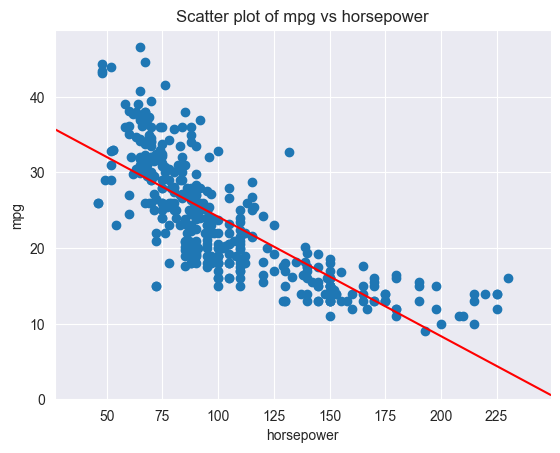

In [279]:
# plot the response vs. predictor
fig, ax = subplots(1,1)
ax.scatter(data['horsepower'], data['mpg']);
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')
ax.set_title('Scatter plot of mpg vs horsepower')

# plot the regression line on the same ax
x_lim = np.array(ax.get_xlim())
y_lim = model.params['intercept'] + model.params['horsepower'] * x_lim
# ax.plot(x_lim, y_lim, color='red');
ax.axline((x_lim[0], y_lim[0]), (x_lim[1], y_lim[1]), color='red');


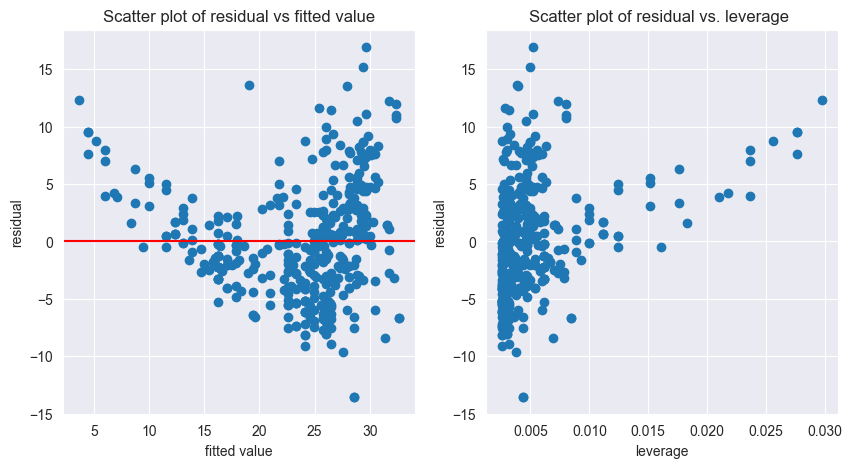

In [280]:
fig, ax = subplots(1,2, figsize=(10,5))

# plot the residual vs. fitted values
ax[0].scatter(model.fittedvalues, model.resid)
ax[0].set_xlabel('fitted value')
ax[0].set_ylabel('residual')
ax[0].set_title('Scatter plot of residual vs fitted value')
# add a y = 0 line for reference in the residual vs. fitted value plot
ax[0].axhline(0, color='red')

# plot the residual vs. leverage plot to identify outliers
influence = model.get_influence()
ax[1].scatter(influence.hat_matrix_diag, influence.resid)
ax[1].set_xlabel('leverage')
ax[1].set_ylabel('residual')
ax[1].set_title('Scatter plot of residual vs. leverage ');

### 8.c

The `residual vs. fitted values` scatter plot shows some patterns, indicating that the true relationship between the predictor `horsepower` and the response `mpg` might not be strictly linear.

The `residual vs. leverage` scatter plot shows that there are some points with high residual have high leverage on the fitted model. This indicates that

## Exercise 9

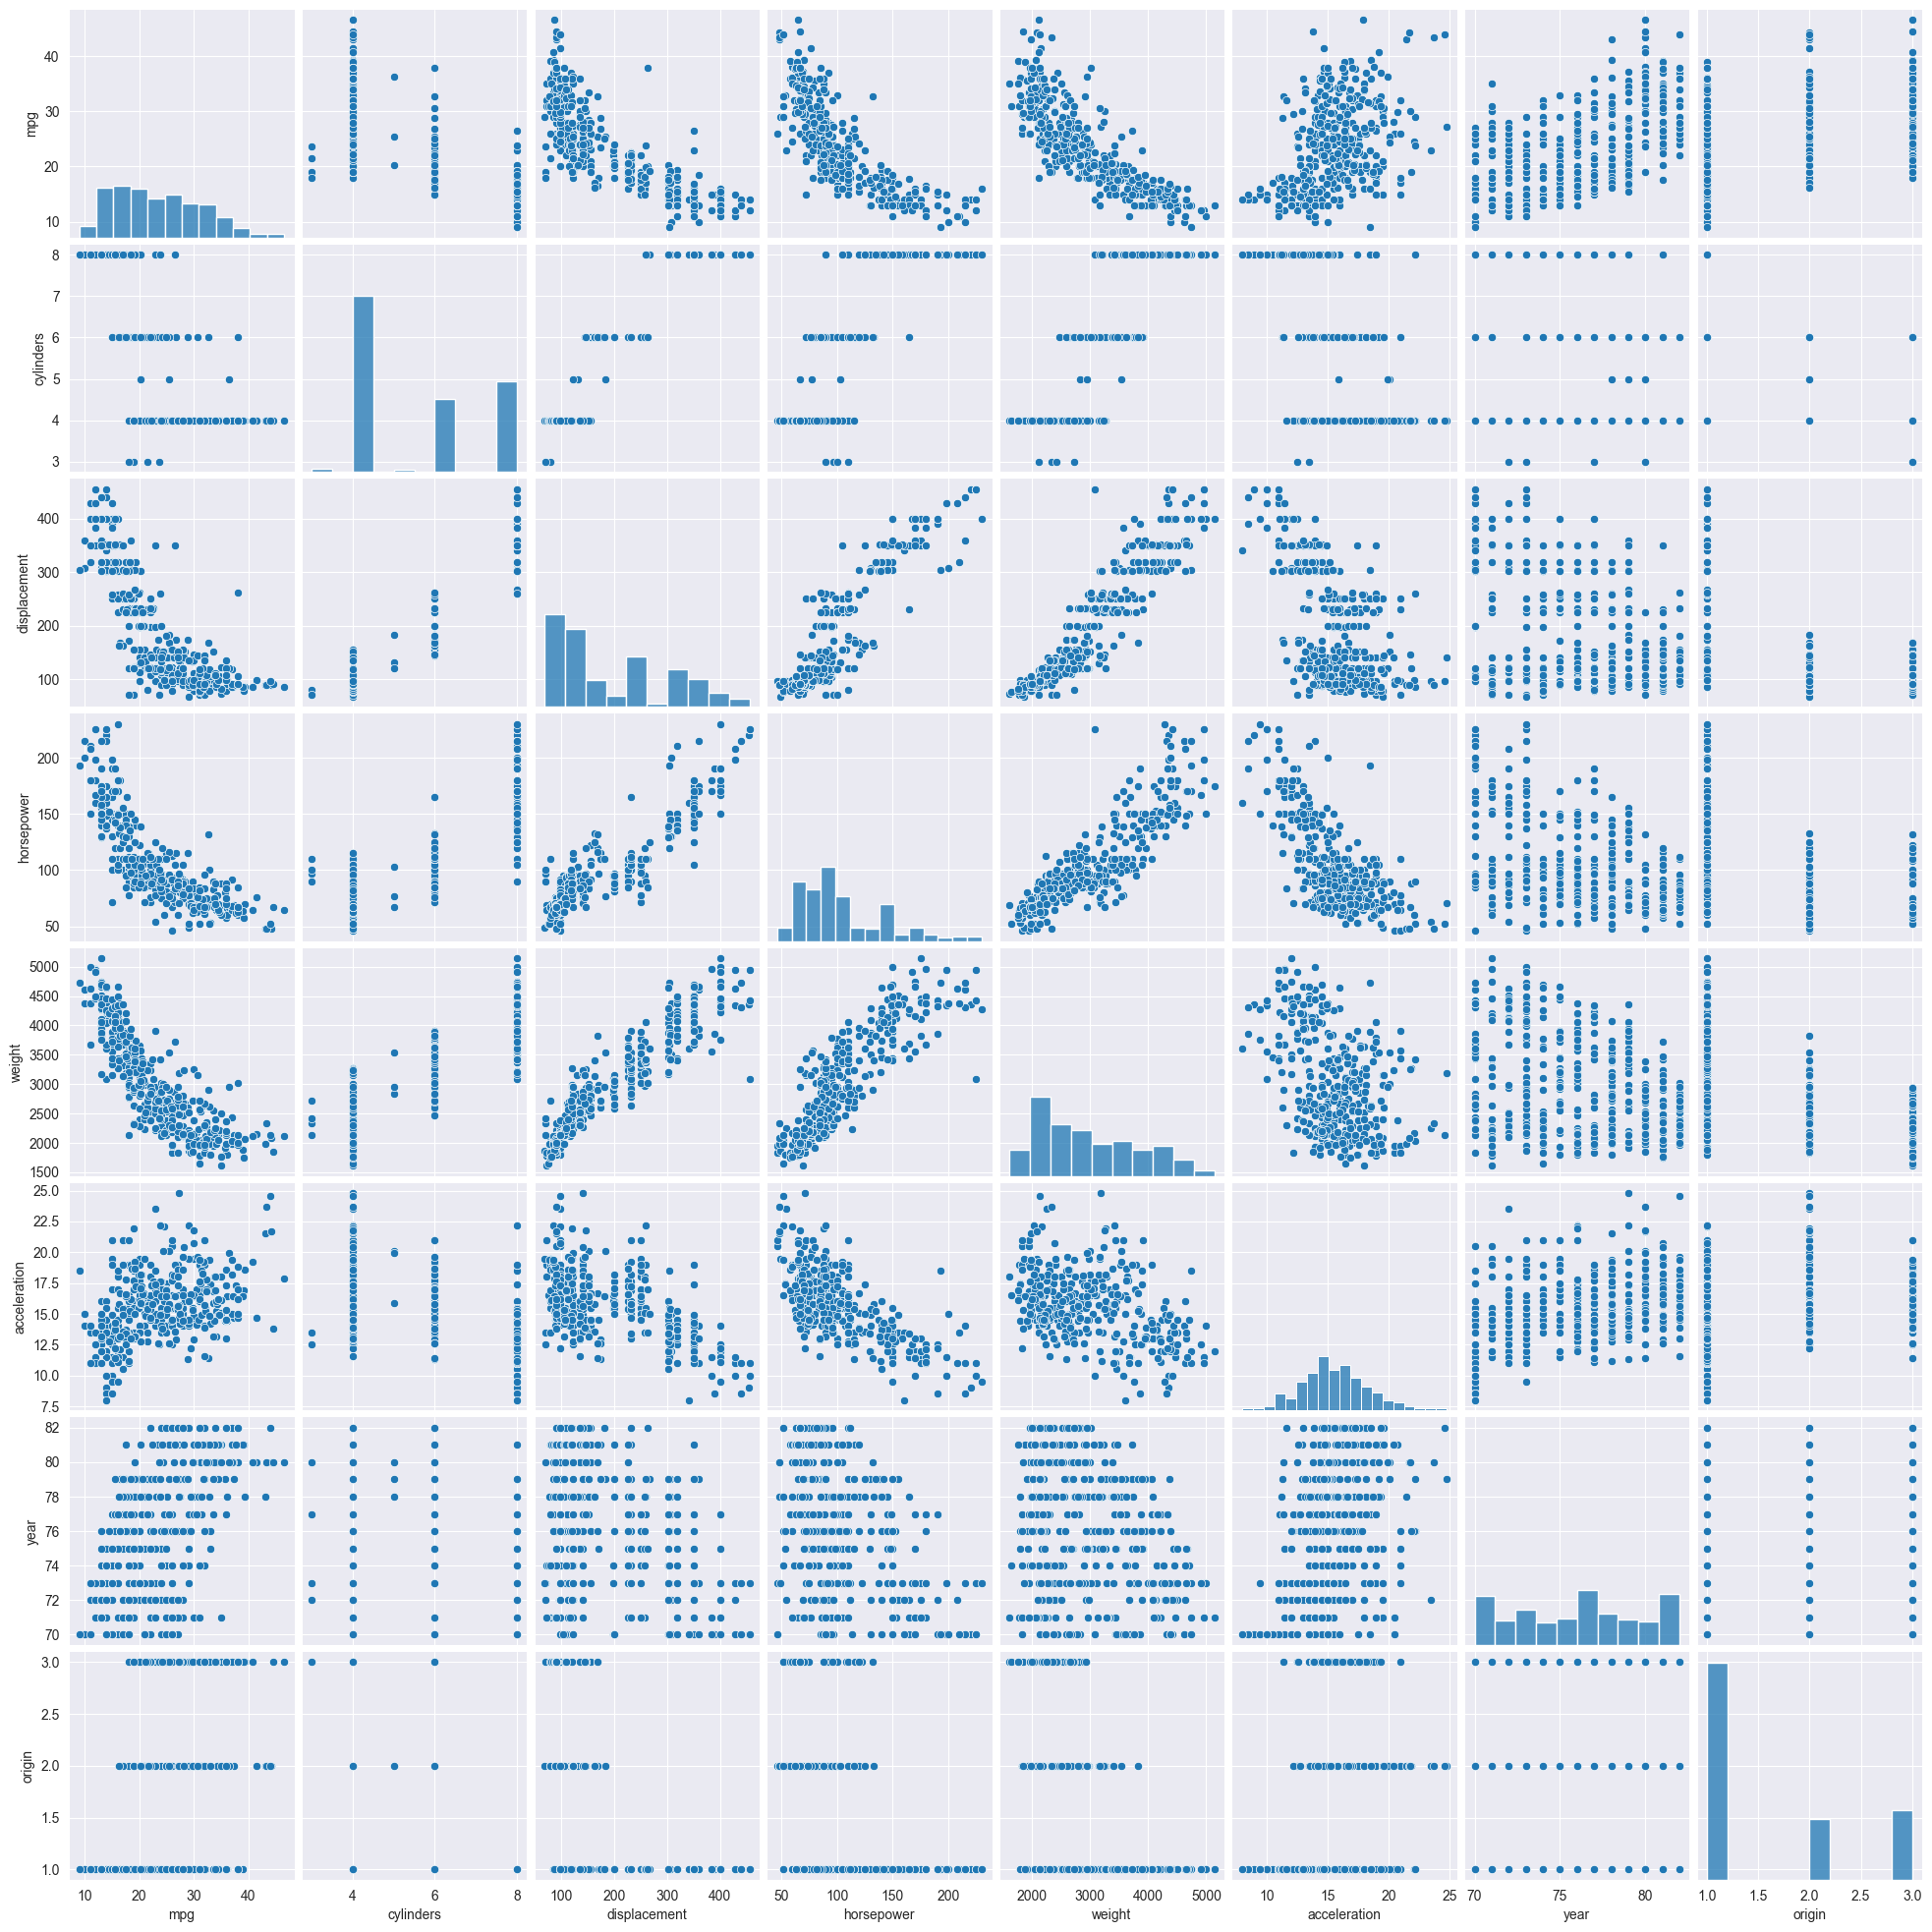

In [281]:
# create a scatterplot matrix which includes all of the variables in the data set
sns.pairplot(data);

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


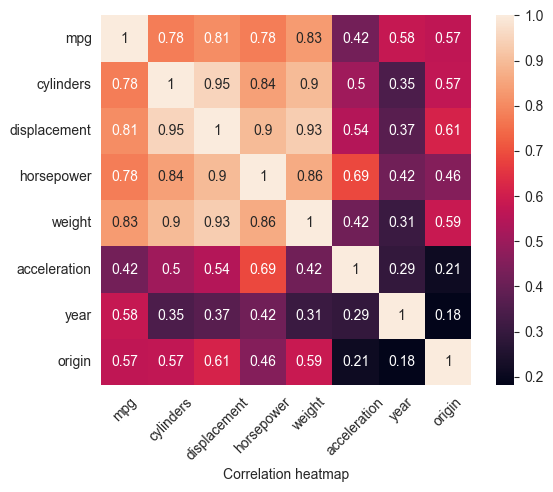

In [282]:
# compute the matrix of correlations between the variables
corr_matrix = data.drop('name', axis=1).corr()

# plot the heatmap to visualize correlation matrix
fig, ax = subplots(1,1)
sns.heatmap(corr_matrix.abs(), annot=True, vmax=1, square=True, ax=ax)
ax.set_xlabel('Correlation heatmap')
plt.xticks(rotation=45)

display(corr_matrix)

### 9.a, 9.b

The scatterplot matrix and the correlation matrix of all the variables of the data set show that some predictors are highly correlated with each other, for instance `horsepower`, `weight`, `displacement` and `cylinders` all have strong positive correlation (above 0.8). This high correlation indicates the presence of multicollinearity, which can be problematic when fitting a regression model that includes all predictors.

Multicollinearity inflates the variance of the estimated coefficients in the regression model, making it hard to determine the individual effect of each predictor on the response `mpg`.

In [283]:
# use the sm.OLS() function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors

# extract training data from the data set
predictors = data.columns.drop(['mpg', 'name'])
X = data[predictors]
X = sm.add_constant(X).rename(columns={'const':'intercept'})
Y = data['mpg']

# initiate and fit model
model_1 = sm.OLS(Y, X).fit()

# display model summary and the comparison between the single and multiple linear regression models
display(model_1.summary())
print('\n\nComparing the single and multiple linear regression models')
display(anova_lm(model, model_1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 07 Oct 2025   Prob (F-statistic):          2.04e-139
Time:                        10:33:59   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



Comparing the single and multiple linear regression models


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63


### 9.c

R squared and adjusted R squared values is rather high (~0.8), indicating that 80% of the variance in `mpg` is explained by the model. Compared with the single linear model with `horsepower` as the only predictor (R squared ~ 0.606), this is a significant increase in explained variance. However, as the number of predictors increases, R squared values increases. This fact, in addition to signs of multicollinearity among the predictors in the data, suggest that the increased in R value must not be strictly viewed an improvement in model performance.

The F-statistic value is high (252.4) with a low p-value (2.04e-193). This strongly disputes the null hypothesis that the coefficients of all the predictors, except the intercept, is 0, implying a statistically strong relationship between the predictors and the response `mpg`.

However, compared to the linear model with `horsepower` as the only predictor, the F-statistic value of the multilinear model is lower (599.7 vs. 252.4). This decrease in F-statistic value is probably due to the increase in the number of predictor p: as p increases, unless sum of squares of residuals (SSR) substantially decreases, the variance that cannot be explained by the model per predictor decreases, while the total variance per degree of freedom increases, resulting in a decrease in F.

Now, looking at the result from the comparison between the 2 models - using the statsmodel.api.anova.anova_lm() function, the sum of squares of residuals (SSR) in the multilinear model is lower than that of the single linear model (4252.21 vs. 9385.92). However, this decrease must be weighted against the added degree of freedom of the model (i.e. number of predictors), which can be evaluated using the F-statistic resulting from the comparison. The F-statistic is high (77.267) with a relatively low p-value (5.37e-63), indicates that the addition of predictors significantly increases model fit, despite a diminishing return per predictor.


Given the existence of multicollinearity among the predictors, the predictors in the multilinear regression model might have unstable coefficient estimates, which results in the unstable t-statistic values and their corresponding high p-values. This instability makes it unreliable to predict the individual effect of each predictor on the response `mpg`, although the overall model fit is statistically sound.

The index of the point with the highest leverage is 13


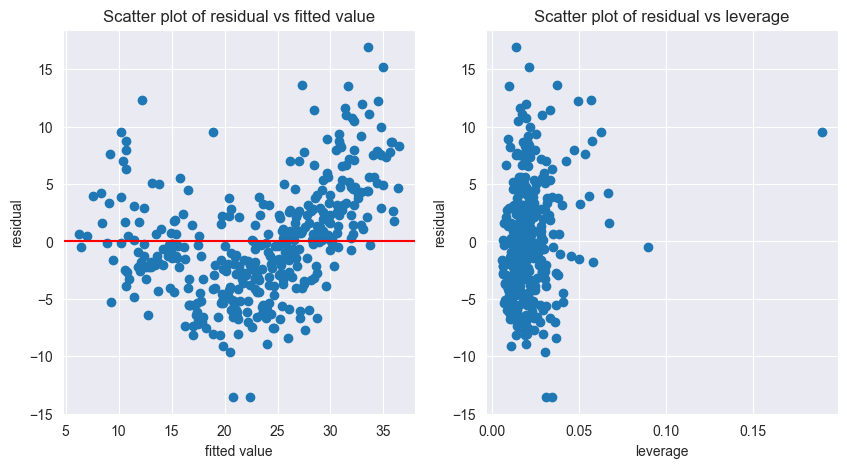

In [284]:
# plot some diagnostic plots of the linear regression fit

fig, ax = subplots(1,2, figsize=(10,5))

# plot the residual vs. fitted value
ax[0].scatter(model_1.fittedvalues, model.resid)
ax[0].set_xlabel('fitted value')
ax[0].set_ylabel('residual')
ax[0].set_title('Scatter plot of residual vs fitted value')
# add a y=0 line
ax[0].axhline(0, color='red')

# plot the leverage vs. residual
influence_1 = model_1.get_influence()
ax[1].scatter(influence_1.hat_matrix_diag, model.resid)
ax[1].set_xlabel('leverage')
ax[1].set_ylabel('residual')
ax[1].set_title('Scatter plot of residual vs leverage');

# print the index of the data point that has the highest leverage
print(f'The index of the point with the highest leverage is {np.argmax(influence_1.hat_matrix_diag)}')

### 9.d

The `residual vs. fitted value` scatter plot shows some patterns, indicating that the true relationship between the predictors and the response `mpg` is not strictly linear.

The `residual vs. leverage` scatter plot shows that most points with high residual values don't necessarily has large influence on the fitted model. The only exception is the point at index 13, which has relatively high residual and leverage value.

In [285]:
# fit some models with interaction terms

# identify predictors with high collinearity based on Variation Inflation Factor (VIF)
vals = [VIF(X, i) for i in range(1, X.shape[1])] # exclude intercept
vifs = pd.DataFrame({'VIF': vals},
                    index=X.columns[1:]) # exclude intercept
display(vifs)

vif_threshold = 2
predictors_collinearity = vifs[vifs['VIF'] >= vif_threshold].index.to_list()

print(f'The predictors with VIF above {vif_threshold} are {predictors_collinearity}')

,VIF
cylinders,10.737535
displacement,21.836792
horsepower,9.943693
weight,10.831260
acceleration,2.625806
year,1.244952
origin,1.772386


The predictors with VIF above 2 are ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']


### 9.e

The Variation Inflation Factor (VIF) show that predictors with high multicollinearity are `cylinders`, `displacements`, `horsepower`, `weight` and `acceleration`. This is in line with the correlation matrix of the predictors.

To mitigate multicollinearity, a few models using different interactive terms among these predictors will be evaluated as follows:
* model_2: `cylinders * displacement * acceleration * horsepower * weight`, `year`, `origin`
* model_3: `cylinders * displacement * acceleration`, `horsepower * weight`, `year`, `origin`

Each interactive term is the product of its component, making its scale significantly larger than the remaining data. To avoid numerical problems, column normalization is performed using the `sklearn.preprocessing.normalize()` function.

In [286]:
def prepare_data(data, predictors, response=None, add_intercept=True, interaction=None, normalize=False, encoding=None):
    """Prepare data from dataframe
    Parameters:
        data (pandas.DataFrame): Dataframe to extract data from
        predictors (list[str]): List of numerical predictors which are columns from data
        response (str): Response variable which is a column from data
        add_intercept (bool): If True, add a column of intercept to the data
        interaction (list[list[str]]): List of interaction variables which are column from data. The format is: ((col1, col2, etc.), (col3,col4,etc.), etc.)
        normalize (bool): If True, normalize the data
        encoding (list): List of categorical predictors to be encoded from data
    Returns:
        If response is None, return a tuple, the first element is the predictor data as a pandas.DataFrame, the second element is the response as a pandas.Series
        Else, return the predictor data as a pandas.DataFrame"""

    # extract predictor data
    X = data[predictors]

    if isinstance(X, pd.Series):
        X = X.to_frame()

    # add intercept
    if add_intercept:
        X.insert(loc=0, column='intercept', value=np.ones(X.shape[0]))

    # create interactive term
    if interaction is not None:
        for term in interaction:
            buf = data[term[0]]
            for col in term[1:]:
                buf = buf.multiply(data[col])
            X.insert(loc=len(X.columns), column=':'.join(term), value=buf)

    # normalize data
    if normalize:
        array = preprocessing.normalize(X, axis=0)
        X = pd.DataFrame(array, columns=X.columns)

    if encoding is not None:
        dummies = pd.get_dummies(data[encoding], prefix=encoding, drop_first=True)
        [X.insert(loc=len(X.columns), column=col, value=dummies[f'{col}'].astype(int)) for col in dummies.columns]

    # return
    if response is not None:
        return X, data[response]
    else:
        return X

def prepare_data_categorical(data, predictors, response=None, add_intercept=True):
    """
    Prepare data from dataframe
    Parameters:
        data (pd.DataFrame): Dataframe to extract data from
        predictors (list[str]): List of categorical predictors which are columns from data
        response (str): Response variable which is a column from data
        add_intercept (bool): If True, add a column of intercept to the data
    Returns:
        If response is None, return a tuple, the first element is the predictor data as a pandas.DataFrame, the second element is the response as a pandas.Series
        Else, return the predictor data as a pandas.DataFrame
    :param data:
    :param predictors:
    :param response:
    :param add_intercept:
    :return:
    """
    X = pd.get_dummies(data[predictors], prefix=predictors, drop_first=True, dtype=int)
    # [X.insert(loc=len(X.columns), column=col, value=dummies[f'{col}'].astype(int)) for col in dummies.columns]

    if add_intercept:
        X.insert(loc=0, column='intercept', value=np.ones(X.shape[0]))

    # return
    if response is not None:
        return X, data[response]
    else:
        return X

# interactive terms
int_2 = [('cylinders', 'displacement', 'acceleration', 'horsepower', 'weight')]
int_3 = [('cylinders', 'displacement', 'acceleration'), ('horsepower', 'weight')]

# prepare data
Xs = [prepare_data(data, predictors=['year', 'origin'], interaction=i, normalize=True)
      for i in [int_2, int_3]]

# fit models
models = [sm.OLS(Y, x).fit() for x in Xs]

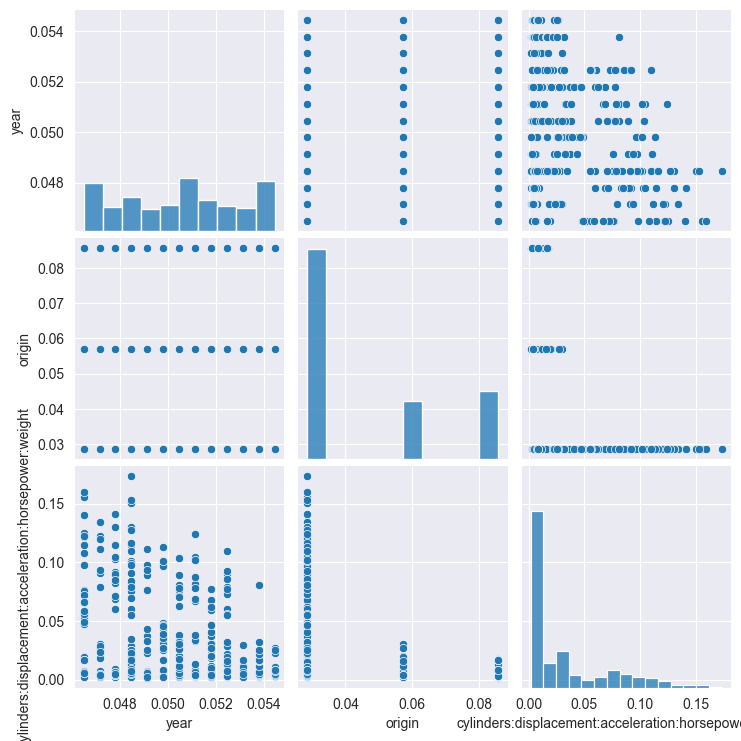

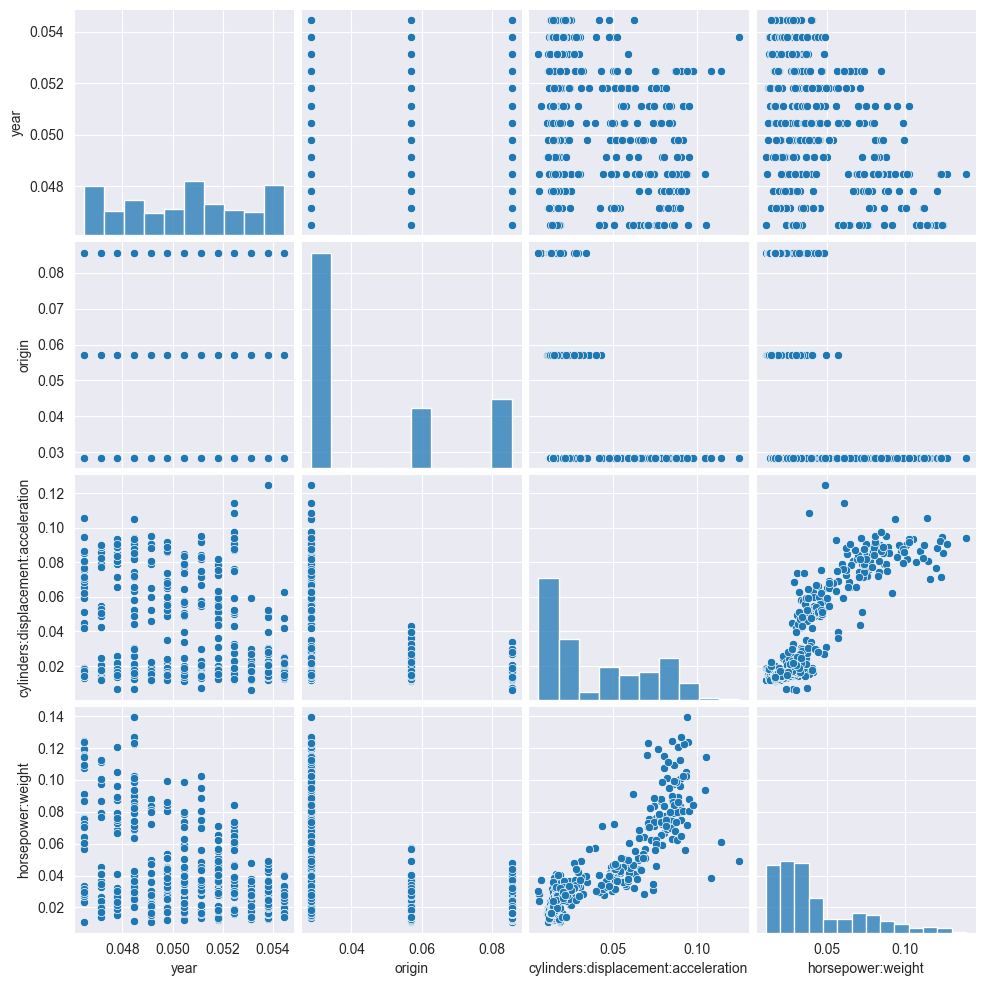

In [287]:
# display scatter pairplots of the different training data to examine multicollinearity
for i in Xs:
    sns.pairplot(i, vars=i.columns[1:])

In [288]:
for i in range(len(models)):
    print(f'Summary of model {i}')
    display(models[i].summary())
    print('*'*50 + '\n'*2)

Summary of model 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     321.0
Date:                Tue, 07 Oct 2025   Prob (F-statistic):          1.01e-104
Time:                        10:34:00   Log-Likelihood:                -1116.6
No. Observations:                 392   AIC:                             2241.
Df Residuals:                     388   BIC:                             2257.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
intercept                                              -675.5031     95.789     -7.052      0.000    -863.834    -487.172
year                                                   1124.4975     93.585     12.016      0.000     940.501    1308.494
origin                                                   88.7039     10.638      8.339      0.000      67.789     109.619
cylinders:displacement:acceleration:horsepower:weight   -97.3806      6.683    -14.572      0.000    -110.519     -84.242
==============================================================================
Omnibus:                       18.874   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.492
Skew:                           0.431   Prob(JB):                     7.92e-06
Kurtosis:                       3.833   Cond. No.                         57.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**************************************************


Summary of model 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     330.9
Date:                Tue, 07 Oct 2025   Prob (F-statistic):          1.91e-123
Time:                        10:34:00   Log-Likelihood:                -1069.9
No. Observations:                 392   AIC:                             2150.
Df Residuals:                     387   BIC:                             2170.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
intercept                            -508.9093     87.530     -5.814      0.000    -681.003    -336.815
year                                 1067.5907     84.117     12.692      0.000     902.208    1232.973
origin                                 54.2476     10.358      5.237      0.000      33.882      74.613
cylinders:displacement:acceleration   -90.9059     14.379     -6.322      0.000    -119.177     -62.635
horsepower:weight                     -80.1486     14.390     -5.570      0.000    -108.441     -51.856
==============================================================================
Omnibus:                       31.990   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.937
Skew:                           0.532   Prob(JB):                     3.20e-12
Kurtosis:                       4.452   Cond. No.                         67.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**************************************************




In [289]:
# compare model performance. model order: single linear regression, model_2 (interactive term), model_3 (interactive term), model_1 (all variables)
anova_lm(model, *models,  model_1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,388.0,6840.076319,2.0,2545.839552,114.952202,6.231956e-40
2,387.0,5388.354595,1.0,1451.721725,131.099078,2.433134e-26
3,384.0,4252.212530,3.0,1136.142064,34.200121,1.304911e-19


### 9.e

The pairplots of the training data for model_2 show that there are still correlational relationship between the two interactive terms `cylinders * displacement * acceleration` and `horsepower * weight`, while that of model_3 presents no pair-wise correlational relationship among the predictors.

The R squared and adjusted R squared values of `model_2` are 0.713 and 0.711 respectively. Those of `model_3` are 0.774 and 0.771 respectively. This indicates that around 71-77% of variance in `mpg` can be explained by these 2 models. This is an improvement compared to the single linear regression model (i.e. `model`)(R squared ~ 0.6), while a decrease compared to the full model (i.e. `model_1`) (R squared ~ 0.8). Given the fact that the number of predictors positively correlates to the value of R squared, the difference in R squared values among these models could be due to the variation in the number of predictors. The sum of squares of residuals (SSR) follows the same patterns as the R square, consistent with the relationship between R square and SSR.

The F-statistic of these 2 models are substantially large (321.0 and 330.9 respectively) with substantially low p-value (1.01e-104 and 1.91e-123 respectively). This strongly rejects the null hypothesis, indicating a statistically strong correlational relationship between the predictors and the response `mpg`.

The F-statistic values of the comparisons among the models, albeit largely vary, are large with significantly low p-values. This indicates that progressing from the single linear `model` to `model_2` and `model_3`, the increase in the number of predictors is substantially offset by the decrease in SSR such that the factor of explained over total variance still increases. Put differently, progressing from `model` to `model_2` and `model_3`, the gain in explained variance significantly increases with the increase in model complexity (i.e. the number of predictors). However, progressing from `model_3` to `model_1`, this offsetting influence decreases, although still sufficient to make the `model_1` statistically sufficient to estimate response `mpg`. Put differently, progressing from `model_1` to `model_3`, the gain in explained variance decreases relative to the increase in model complexity.

In [290]:
# try a few different transformations of the variables, such as log(X), root(X), square(X)

# transform the predictors
func = [np.log, np.sqrt, np.square]
Xs = []
for f in func:
    buf = data[predictors].copy().apply(func=f)
    buf.insert(loc=0, column='intercept', value=np.ones(data.shape[0]))
    Xs.append(buf)

# fit models
models = [sm.OLS(Y, x).fit() for x in Xs]

for i in range(len(models)):
    print(f'Summary of model {i}')
    display(models[i].summary())
    print('*'*50 + '\n'*2)

Summary of model 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     306.5
Date:                Tue, 07 Oct 2025   Prob (F-statistic):          6.67e-153
Time:                        10:34:00   Log-Likelihood:                -991.70
No. Observations:                 392   AIC:                             1999.
Df Residuals:                     384   BIC:                             2031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -66.5643     17.505     -3.803      0.000    -100.982     -32.146
cylinders        1.4818      1.659      0.893      0.372      -1.780       4.743
displacement    -1.0551      1.538     -0.686      0.493      -4.080       1.970
horsepower      -6.9657      1.557     -4.474      0.000     -10.027      -3.905
weight         -12.5728      2.225     -5.650      0.000     -16.948      -8.198
acceleration    -4.9831      1.608     -3.099      0.002      -8.144      -1.822
year            54.9857      3.555     15.465      0.000      47.995      61.976
origin           1.5822      0.508      3.113      0.002       0.583       2.582
==============================================================================
Omnibus:                       40.670   Durbin-Watson:                   1.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.138
Skew:                           0.587   Prob(JB):                     2.40e-18
Kurtosis:                       4.894   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**************************************************


Summary of model 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     275.3
Date:                Tue, 07 Oct 2025   Prob (F-statistic):          2.17e-145
Time:                        10:34:00   Log-Likelihood:                -1009.4
No. Observations:                 392   AIC:                             2035.
Df Residuals:                     384   BIC:                             2067.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -49.7981      9.178     -5.426      0.000     -67.844     -31.752
cylinders       -0.2370      1.538     -0.154      0.878      -3.260       2.786
displacement     0.2258      0.229      0.984      0.326      -0.225       0.677
horsepower      -0.7798      0.308     -2.533      0.012      -1.385      -0.174
weight          -0.6217      0.079     -7.872      0.000      -0.777      -0.466
acceleration    -0.8253      0.834     -0.989      0.323      -2.466       0.815
year            12.7903      0.859     14.891      0.000      11.102      14.479
origin           3.2604      0.768      4.247      0.000       1.751       4.770
==============================================================================
Omnibus:                       40.498   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.517
Skew:                           0.608   Prob(JB):                     4.00e-17
Kurtosis:                       4.773   Cond. No.                     3.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**************************************************


Summary of model 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     216.8
Date:                Tue, 07 Oct 2025   Prob (F-statistic):          3.57e-129
Time:                        10:34:00   Log-Likelihood:                -1047.6
No. Observations:                 392   AIC:                             2111.
Df Residuals:                     384   BIC:                             2143.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        1.2080      2.356      0.513      0.608      -3.424       5.840
cylinders       -0.0883      0.025     -3.502      0.001      -0.138      -0.039
displacement   5.68e-05   1.38e-05      4.109      0.000    2.96e-05     8.4e-05
horsepower   -3.621e-05   4.98e-05     -0.728      0.467      -0.000    6.16e-05
weight       -9.351e-07   8.98e-08    -10.416      0.000   -1.11e-06   -7.59e-07
acceleration     0.0063      0.003      2.334      0.020       0.001       0.012
year             0.0050      0.000     14.160      0.000       0.004       0.006
origin           0.4129      0.069      5.971      0.000       0.277       0.549
==============================================================================
Omnibus:                       21.204   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.337
Skew:                           0.431   Prob(JB):                     4.26e-07
Kurtosis:                       4.027   Cond. No.                     1.45e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**************************************************




### 9.f

The three models fitted using transformed predictors show comparable performance to the full model using raw predictors. In particular, the R-squared and adjusted R-squared are high, in the range 79-84%. This indicates that these 3 models can explain around 79-80% of the variance in `mpg`. The F-statistics are sufficiently high (ranging from ~217 to 306) with extremely low p-values, rejecting the null hypothesis.

However, multicollinearity remains a concern, as shown in the high condition number of each model. This suggests that numerically transforming predictors doesn't sufficiently break the correlational relationship among predictors when the transformation still preserves the ordering or scale relationships. So, numerical transformation is not sufficient to resolve multicollinearity.

## Exercise 10

Dataset description: https://intro-stat-learning.github.io/ISLP/datasets/Carseats.html

In [291]:
data_10 = load_data('Carseats')

# set up predictors and response
X_10_a, Y_10 = prepare_data(data_10, predictors=['Price'], response='Sales', add_intercept=True, encoding=['Urban', 'US'])

# fit model
model_10_a = sm.OLS(Y_10, X_10_a).fit()
model_10_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           2.39e-23
Time:                        10:34:01   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban_Yes     -0.0219      0.272     -0.081      0.936      -0.556       0.512
US_Yes         1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 10.c

The model has the following form:

$ \hat{Sales} = \hat{\beta_0} + \hat{\beta_1} \times Price + \hat{\beta_2} \times Urban\_Yes + \hat{\beta_3} \times US\_Yes$

$ \hat{Sales} = 13.0435 -0.0545 \times Price -0.0219 \times Urban\_Yes + 1.2006 \times US\_Yes$

Where `Urban_Yes` and `US_Yes` is either 0 or 1.

### 10.b
The coefficient, t-statistic and p-values show the relationship between each predictor and the response. In particular:
* The coefficient for `Urban_Yes` is -0.0219 with a very high p-value (0.936). This means that there is no evidence that store location (rural vs. urban) has any meaningful effect on `Sales`
* The coefficient for `Price` is -0.0545, with a significant t-statistic (-10.389) and low p-value (0.000). This indicates that `Price` has a strong negative association with `Sales`. In particular, holding other variable constant, a decrease of \$1000 in `Price` is associated with an increase of about 55 units of `Sales`. Conversely, an increase of \$1000 in `Price` is expected to reduce `Sales` by about 55 units.
* The coefficient for `US_Yes` is approximately 1.2 with a significant t-statistic (4.635) and a low p-value (0.000). This indicates that this predictor has a statistically significant positive correlation with the response `Sales`. This is a qualitative predictor, whose values are either 0 or 1, signifying if the store is located in the US. It means that, holding other variable constant, stores in the US sell on average 120 more units than those outside the US.

### 10. d
Given the t-statistic and p-values of each predictor, there is strong statistical evidence to reject the null hypothesis for `Price` and `US_Yes`.

In [292]:
# fit a new model using only `Price` and `US_Yes`

# set up predictors and response
X_10_e = prepare_data(data_10, predictors=['Price'], add_intercept=True, encoding=['US'])

# fit model
model_10_e = sm.OLS(Y_10, X_10_e).fit()
model_10_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           2.66e-24
Time:                        10:34:01   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US_Yes         1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:
anova_lm(model_10_e, model_10_a)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,397.0,2420.874462,0.0,NaN,NaN,NaN
1,396.0,2420.834671,1.0,0.03979,0.006509,0.935739


### 10.f

Model (a) has 3 predictors: `Price`, `US_Yes`, `Urban_Yes`. Model (e) has 2 predictors: `Price`, `US_Yes`

The performances of model (a) and model (e) are similar. Their R-squared values are both 0.239, indicating that these two models can explain approximately 23.9% variance in the data. The adjusted R-squared, which accounts for the number of predictors, is 0.234 for Model (a) and is 0.235 for Model (e), suggesting a marginal improvement in parsimony with fewer predictors.

The difference in sum of squared residuals (`ss_diff`) between the 2 models is negligible, 0.03979. Moreover, the F-statistics from the nested model comparison is rather low (0.006509) with a high p-value (0.935739), indicating that the additional explanatory power provided by including the predictor `Urban_Yes` in Model (a) is statistically insignificant. This finding is consistent with the observation that predictor `Urban_Yes` has a very high p-value in Model (a) (0.936), suggesting it is not a significant predictor to begin with.

These results collectively suggest that removing the predictor `Urban_Yes` doesn't significantly worsen the model's explanatory power and result in a parsimonious model without any meaningful loss of fit.

In [294]:
# Using the model (e), obtain 95% confidence intervals for the coefficients
model_10_e.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US_Yes,0.69152,1.707766


### 10.h

Since Model (e) is a multilinear model, it is impossible to present the response against predictors in a 2D scatter plot to detect outliers and high leverage observations. Although pairplots of predictors don't exhaustively reveal all high leverage observations because it can show the relationship between 2 predictors at a time, they can still provide a decent first glance into the data.

Outliers are observations with irregular response values. These points are distributed far from the regression plane and have high residuals. So, they can be best observed from the residual plot. High leverage observations are those with irregular predictor values, unusual in the multidimensional feature space. High leverage points can be observed from the leverage scatter plot using the attribute *statsmodels.regression.linear_model.OLSResults.get_influence().hat_matrix_diag*.

The set of **Pairplots** reveals that there are outliers and observations with high leverage. In particular:
* In the plot `Price` against `US_Yes`, there are some points with extreme `Price` values, both in the higher and lower end, in both the `US_Yes=0` and `US_Yes=1` categories. These unusual points in the predictor space indicate observations with high leverage.
* Additionally, in the plot `Sales` against `Price` there are some observations that deviate significantly from the general linear trend line, indicating potential outliers.

The **Residual** plot doesn't exhibit any patterns.

The **Leverage** indicates the presence of some observations with significantly higher leverage (above 0.04) compared to the majority of the data points, which are clustered at lower leverage values. The residual value of these observations, however, is rather small compared to others with lower leverage. Therefore, while these observations have high leverage, they don't significantly skew the model far from the true relationship between the predictors and response.

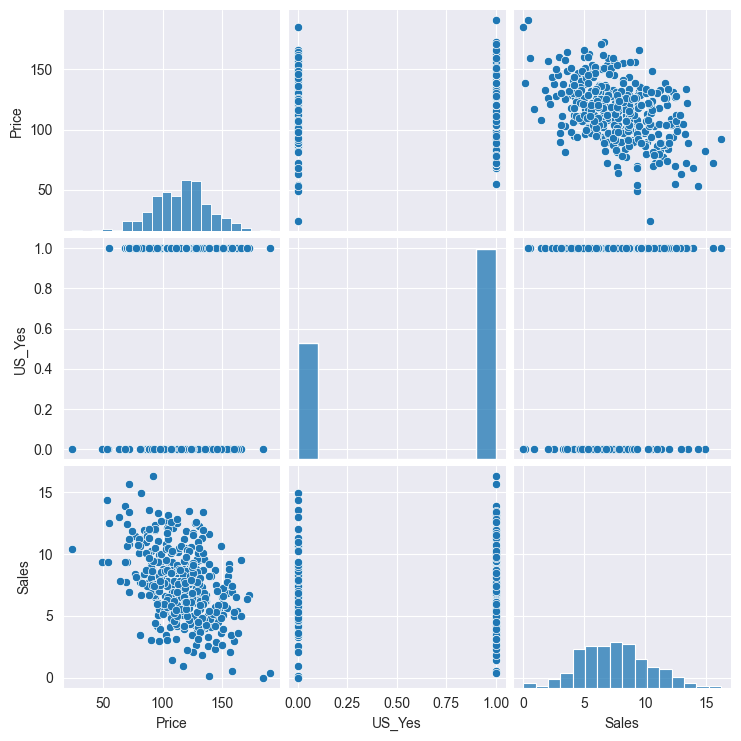

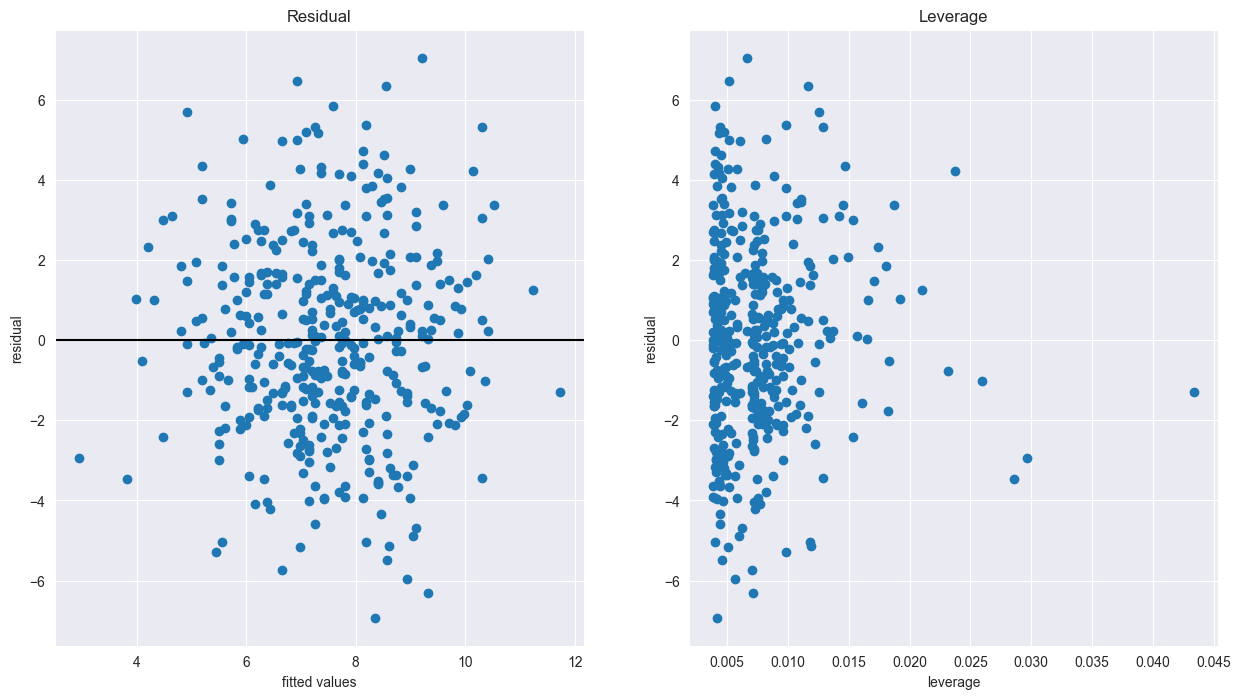

In [295]:
# pairplots
buf_data = X_10_e.copy(deep=True).drop(columns=['intercept'])
buf_data.insert(buf_data.shape[1], column='Sales', value=Y_10)
sns.pairplot(buf_data)

# plot residuals and leverage
influence_2 = model_10_e.get_influence()

# generate a figure
fig, ax = plt.subplots(1,2, figsize=(15,8))

# outliers: irregular y
ax[0].scatter(model_10_e.fittedvalues, model_10_e.resid)
ax[0].set_xlabel('fitted values')
ax[0].set_ylabel('residual')
ax[0].set_title('Residual')
ax[0].axhline(0, color='k')

# high leverage observations: irregular x
ax[1].scatter(influence_2.hat_matrix_diag, influence_2.resid)
ax[1].set_xlabel('leverage')
ax[1].set_ylabel('residual')
ax[1].set_title('Leverage');

## Exercise 11

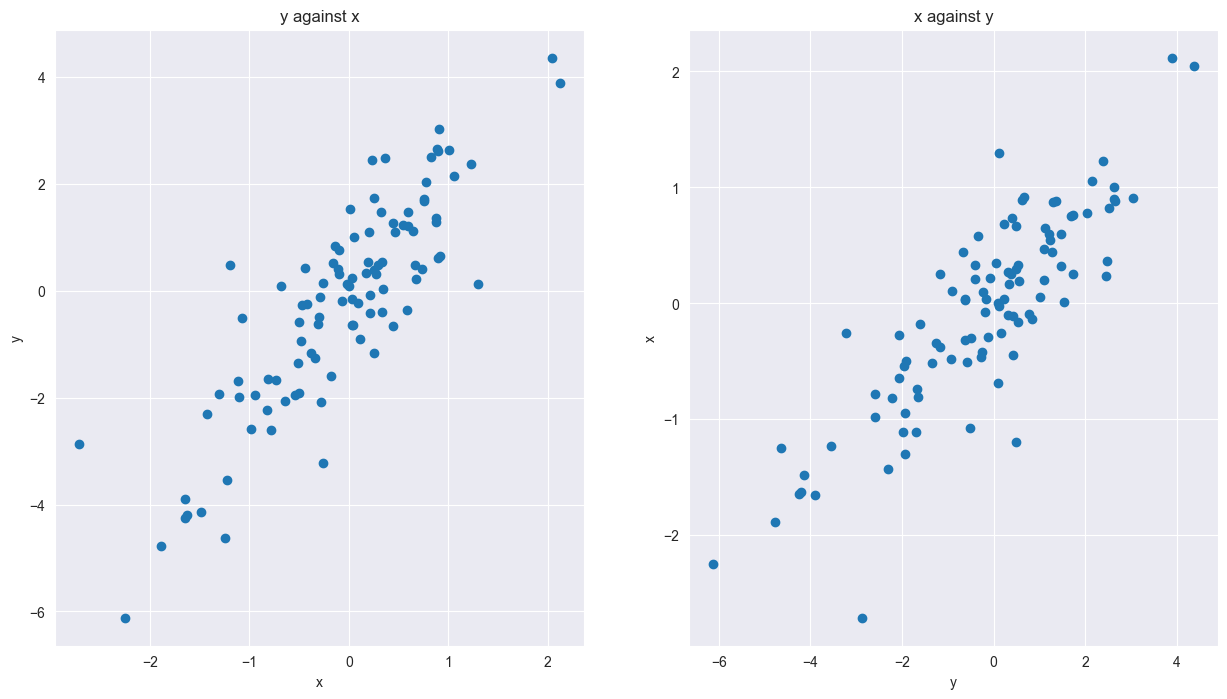

In [296]:
# generate predictor x and response y per instructions
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

# plot the response y against predictor x; plot the predictor x against response y
fig, ax = plt.subplots(1,2, figsize=(15,8))

ax[0].scatter(x, y)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('y against x')

ax[1].scatter(y, x)
ax[1].set_xlabel('y')
ax[1].set_ylabel('x')
ax[1].set_title('x against y');

In [297]:
# simple linear regression of y onto x without an intercept
model_11_a = sm.OLS(y, x).fit()
model_11_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 07 Oct 2025   Prob (F-statistic):                    6.23e-31
Time:                        10:34:02   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 11.a

The simple linear regression model shows a strong fit to the data. The (uncentered) R-squared value is 0.743, indicating that the model can explain approximately 74.3% of the variance in the response **y**.

The F-statistic is high (285.6), with a significantly low p-value (6.23e-31), strongly rejects the null hypothesis that there is no relationship between the predictor **x** and response **y**.

The coefficient  for **x** is $\hat{\beta}=1.9762$, which is quite close to the value 2 used to generate the data. The standard error is 0.117. The 95% confidence interval is between 1.744 and 2.208, which lies sufficiently far from 0 and contains the true parameter. Additionally, the t-statistic is significantly large (16.898) with a p-value of 0.000, further reinforcing that the coefficient **x** $\hat{\beta}$ is significantly different from 0.

In summary, the model offers a good fit for response **y**. It can account for a large portion of the variance in **y**. The null hypothesis $H_0: \beta=0$ is strongly rejected by the significantly high F-statistic value (with very low p-value) and sufficiently high t-value (with low p-value), indicating that there is a relationship between the predictor **x** and response **y**.

In [298]:
# simple linear regression of y onto x without an intercept
model_11_b = sm.OLS(x, y).fit()
model_11_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 07 Oct 2025   Prob (F-statistic):                    6.23e-31
Time:                        10:34:02   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 11.b

The simple linear regression model shows a strong fit to the data. The (uncentered) R-squared value is 0.743, indicating that the model can explain approximately 74.3% of the variance in the response **x**.

The F-statistic is high (285.6), with a significantly low p-value (6.23e-31), strongly rejects the null hypothesis that there is no relationship between the predictor **y** and response **x**.

The coefficient  for **y** is $\hat{\beta}=0.3757$, which is quite close to the 0.5 - the inverse of the value used to generate the data. The standard error is 0.022. The 95% confidence interval is between 0.332 and 0.420, which lies sufficiently far from 0. Additionally, the t-statistic is significantly large (16.898) with a p-value of 0.000, further reinforcing that the coefficient for **y** $\hat{\beta}$ is significantly different from 0.

In summary, the model offers a good fit for response **x**. It can account for a large portion of the variance in **x**. The null hypothesis $H_0: \beta=0$ is strongly rejected by the significantly high F-statistic value (with very low p-value) and sufficiently high t-value (with low p-value), indicating that there is a relationship between the predictor **y** and response **x**.

### 11.c

The result in (a) and (b) are compatible, even when the roles of x and y are swapped. In particular, both models have (uncentered) R-squared value of 0.743, being able to account for 74.3% of the variance in the response. They both have F-statistic value of 285.6, with a significantly low p-value (6.23e-31). Additionally, the t-statistic value of both models equal 16.898. The coefficient of model a is 1.9762, which is close to the value 2 used to generate y from x. The coefficient of model b is 0.3757, which is close to 0.5 - the inverse of the value 2 used to generate y from x.

### 11.d

Confirm numerically that the t-statistic can be written as:

$$
\frac{(\sqrt{n - 1}) \sum_{i=1}^{n} x_i y_i}{\sqrt{(\sum_{i=1}^{n} x_i^2)(\sum_{i'=1}^{n} y_{i'}^2) - (\sum_{i'=1}^{n} x_{i'}y_{i'})^2}}
$$

The t-statistic equals to 16.898 when calculated using this formula (see code cell below). This is the t-statistic for both models (a) and (b).

### 11.e

In the formula of t-statistic from (d), the role of x and y are interchangeable. So, the t-statistic for the regression of y onto x is the same as the t-statistic for the regression of x onto y. This is confirmed by the value of t-statistic of model (a) and model (b), as well as the value calculated using the formula.

In [299]:
# calculate t-statistic using the formula in 11.d
t_numerator = np.sqrt(x.shape[0]-1) * np.sum(x * y)
t_denominator = np.sqrt(np.sum(x**2) * np.sum(y**2) - (np.sum(x*y)**2))
t_statistic = t_numerator / t_denominator
print(f'Using the formula in (d), t-statistic = {t_statistic}')

Using the formula in (d), t-statistic = 16.898417063035094


In [300]:
# fit simple regression model of y onto x with an intercept
x_f = np.append(np.ones((x.shape[0],1)), np.reshape(x, (x.shape[0], 1)), axis=1)
model_11_f_1 = sm.OLS(y, x_f).fit()
print(f'Performance of simple regression model of y onto x with an intercept')
display(model_11_f_1.summary())

# fit simple regression model of x onto y with an intercept
y_f = np.append(np.ones((y.shape[0],1)), np.reshape(y, (y.shape[0], 1)), axis=1)
model_11_f_2 = sm.OLS(x, y_f).fit()
print('\n'*2 + '*'*50 + '\n'*2)
print(f'Performance of simple regression model of x onto y with an intercept')
display(model_11_f_2.summary())

Performance of simple regression model of y onto x with an intercept


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           1.74e-30
Time:                        10:34:03   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      98   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0760      0.101     -0.756      0.451      -0.276       0.124
x1             1.9686      0.118     16.734      0.000       1.735       2.202
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



**************************************************


Performance of simple regression model of x onto y with an intercept


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           1.74e-30
Time:                        10:34:03   Log-Likelihood:                -58.325
No. Observations:                 100   AIC:                             120.6
Df Residuals:                      98   BIC:                             125.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0095      0.044      0.216      0.829      -0.078       0.097
x1             0.3763      0.022     16.734      0.000       0.332       0.421
==============================================================================
Omnibus:                       13.123   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.501
Skew:                          -0.528   Prob(JB):                     1.30e-05
Kurtosis:                       5.070   Cond. No.                         1.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 11.f

When perform a simple linear regression with an intercept the t-statistic of the coefficient $\beta_1$ of:
* the model of y onto x is 16.734.
* the model of x onto y is 16.734.

The result shows that when regression is performed with an intercept, the t-statistic for $H_0: \beta_1 = 0$ is the same for the regression of y onto x as it is for the regression of x onto y.

## Exercise 12

### 12.a

The coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X when $|\frac{x_i}{y_i}|=1$. In this case, $|\hat{\beta}|=1$

In [301]:
# coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X
x_12_b = rng.normal(size=100)
y_12_b = 2 * x_12_b + rng.normal(size=100)

model_12_b1 = sm.OLS(y_12_b, x_12_b).fit()

model_12_b2 = sm.OLS(x_12_b, y_12_b).fit()

print(f'Coefficient estimate for the regression model of y onto x: {model_12_b1.params}')
print(f'Coefficient estimate for the regression model of x onto y: {model_12_b2.params}')

Coefficient estimate for the regression model of y onto x: [2.0958372]
Coefficient estimate for the regression model of x onto y: [0.39788356]


In [302]:
# coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X
x_12_c = rng.normal(size=100)
y_12_c = -x_12_c

model_12_c1 = sm.OLS(y_12_c, x_12_c).fit()

model_12_c2 = sm.OLS(x_12_c, y_12_c).fit()

print(f'Coefficient estimate for the regression of y onto x: {model_12_c1.params}')
print(f'Coefficient estimate for the regression of x onto y: {model_12_c2.params}')

Coefficient estimate for the regression of y onto x: [-1.]
Coefficient estimate for the regression of x onto y: [-1.]


## Question 13

In [303]:
# Generate data
rng = np.random.default_rng(1)
x_13 = rng.normal(loc=0, scale=1, size=100)
eps_a = rng.normal(loc=0, scale=0.25, size=100)
y_13_a = -1 + 0.5 * x_13 + eps_a

### 13.c
Vector Y has length 100.

$\beta_0 = -1$

$\beta_1 = 0.5$

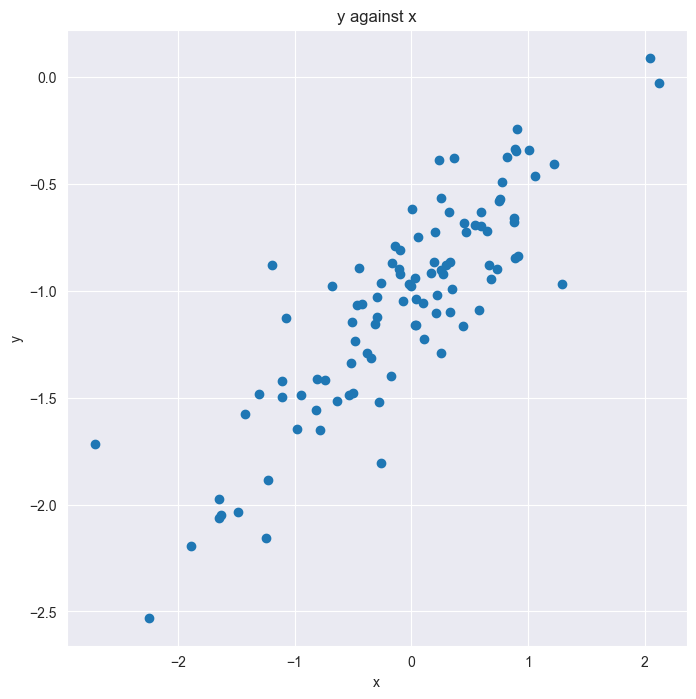

In [304]:
# create a scatter plot of y against x
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.scatter(x_13, y_13_a)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('y against x');

### 13.d

The plot y against x reveals a positive linear relationship between the predictor x and the response y. As x increases, so does y.

The points are closely distributed along a straight line. The variance in the data is relatively low enough to not distort the linear relationship between x and y, granting the relationship line perceivable in the scatter plot.

The scatter plot shows that the line of fit has a slope of approximately 0.5, and a y-intercept centered around $y=-1$. These figures align with the values of coefficients $\beta_0$ and $\beta_1$ used to generate y from x.

In [305]:
# fit a least squares line to predict y using x

# create the predictor matrix, add constant to the predictor matrix
x_13_a = np.insert(x_13.reshape(x_13.shape[0], 1), 0, np.ones(x_13.shape), axis=1)

model_13_a = sm.OLS(y_13_a, x_13_a).fit()
display(model_13_a.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           1.74e-30
Time:                        10:34:03   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0190      0.025    -40.537      0.000      -1.069      -0.969
x1             0.4921      0.029     16.734      0.000       0.434       0.551
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 13.e

The obtained least squares linear model offers a sufficiently high explainability power for the response **y** and accurately captures the correlation between the predictor **x** and response **y**.

The model demonstrates strong explanatory power and high statistical significance. In particular:
* The R squared values is 0.741, indicating that the model can explain 74.1% of the variance in the response **y**.
* The F-statistic value is high (280) and has a low p-value (1.74e-30). The t-statistic values of the 2 coefficients $\hat{\beta_0}$ and $\hat{\beta_1}$ are far from 0 (-40.537 and 16.734 respectively) with low p-values (virtually 0). Furthermore, the respective confidence interval of these two coefficients don't contain the value 0. These signs strongly reject the null hypothesis that $\hat{\beta_i} = 0$.

The estimated coefficients of the model are remarkably close to their true values:
* $\hat{\beta_0} = -1.0190$, which is relatively close to the true value -1. Its 95% confidence interval is \[-1.069, -0.969], which include the true value -1.
* Similarly, $\hat{\beta_1} = 0.4921$, which is relatively close to the true value 0.5. Its 95% confidence interval is \[0.434, 0.551], which include the true value 0.5.

The values of $\hat{\beta_0}$ and $\hat{\beta_1}$ being close $\beta_0$ and $\beta_1$ respectively indicates that while the model accounts is susceptible to variance in the response **y**, since the variance is relatively low, it doesn't significantly divert the model from capturing the true relationship between the predictor and the response **y**.

### 13.f

In the scatter plot of y against x, the least squares line and the population regression line are very close to one another, confirming that the model accurately captures the relationship between predictor **x** and response **y**.

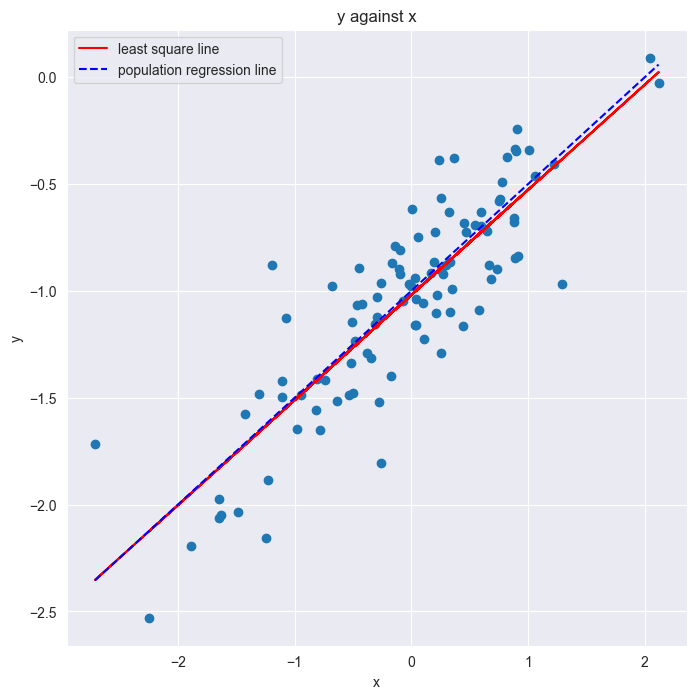

In [306]:
def plot_scatter_simple_linear(x, y, bi_estimate=None, bi_true=None, subplot=None):
    """
    Plot a scatter plot of y against x.
    Parameters:
        x (np.array): a 1D vector of x values
        y (np.array): a 1D vector of y values
        bi_estimate (list[float, float]): the estimated values of b0 and b1
        bi_true (list[float, float]): the true values of b0 and b1
        subplot (tuple [Figure, Axes]): the subplot number
    Return:
        Figure, Axes (tuple [Figure, Axes]): figure and axes objects
    """
    if subplot is None:
        fig, ax = plt.subplots(1,1, figsize=(8,8))
    else:
        fig, ax = subplot

    # scatter plot of x and y
    ax.scatter(x, y)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('y against x')

    # least squares line
    if bi_estimate is not None:
        y_estimate = bi_estimate[0] + bi_estimate[1] * x
        ax.plot(x, y_estimate, color='r', label='least square line')

    # population regression line
    if bi_true is not None:
        x_min = x.min(axis=0)
        x_max = x.max(axis=0)
        x_vals = np.linspace(x_min, x_max, x.shape[0])
        y_vals = bi_true[0] + bi_true[1] * x_vals
        ax.plot(x_vals, y_vals, color='b', linestyle='--', label='population regression line')

    ax.legend()

    return fig, ax

# plot the least squares line and the population regression line on the scatter plot of y against x
bi_true = (-1, 0.5)
bi_estimate = (-1.0190, 0.4921)
plot_scatter_simple_linear(x_13, y_13_a, bi_estimate=bi_estimate, bi_true=bi_true);

In [307]:
# fit a polynomial regression model by adding the quadratic term x^2.

# create predictor matrix X: constant, x, x^2
x_13_g = np.insert(x_13.reshape(x_13.shape[0], 1), 0, np.ones(x_13.shape), axis=1)
x_13_square = x_13 ** 2
x_13_g = np.insert(x_13_g, x_13_g.shape[1], x_13_square, axis=1)

model_13_g = sm.OLS(y_13_a, x_13_g).fit()
display(model_13_g.summary())

print('\n'*2 + '*'*50 + '\n'*2 + f'Comparing simple linear regression and polynomial regression models')
display(anova_lm(model_13_a, model_13_g))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     138.6
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           3.66e-29
Time:                        10:34:03   Log-Likelihood:                -2.4293
No. Observations:                 100   AIC:                             10.86
Df Residuals:                      97   BIC:                             18.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0182      0.030    -34.186      0.000      -1.077      -0.959
x1             0.4916      0.032     15.562      0.000       0.429       0.554
x2            -0.0012      0.023     -0.052      0.959      -0.046       0.044
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.814
Skew:                           0.119   Prob(JB):                        0.666
Kurtosis:                       3.372   Cond. No.                         2.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



**************************************************

Comparing simple linear regression and polynomial regression models


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,98.0,6.146642,0.0,NaN,NaN,NaN
1,97.0,6.146471,1.0,0.00017,0.002688,0.958757


### 13.g

The addition of the quadratic term **$x^2$** offers no meaningful improvement to the model.

The quadratic term **$x^2$** doesn't improve the explanatory power of the model.
* The R squared value of the polynomial regression model is 0.741, indicating that the model can account for 74.1% of the variance in the response **y**. This R squared value equals that of the simple linear model, indicating that there is no improvement in the explanatory power of the model with the added quadratic term **$x^2$**.
* The difference in sum of residual square between the polynomial regression model and the simple linear regression model is very insignificant (0.00017), indicating that the addition of the quadratic term **$x^2$** doesn't significantly improve the estimation of the response **y**. Furthermore, the F-statistic of the nested model comparison is infinitesimal (0.002688) with a very high p-value (0.958757). This indicates that moving from the simple linear regression to the polynomial regression model, there is no statistically significant increase in explained variance brought about by the addition of the quadratic term **$x^2$**.

Additionally, there is no correlation between the quadratic term **$x^2$** and the response **y**
* The coefficient of **$x^2$** is -0.0012. The t-statistic value is quite close to 0 (-0.052) with a high p-value (0.959). Additionally, the 95% confidence interval of the coefficient of **$x^2$** is \[-0.046, 0.044], which include the value 0. These signs indicate that there is no statistically significant relationship between the quadratic term **$x^2$** and the response **y**.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     2120.
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           3.39e-68
Time:                        10:34:03   Log-Likelihood:                 97.462
No. Observations:                 100   AIC:                            -190.9
Df Residuals:                      98   BIC:                            -185.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0162      0.009   -109.770      0.000      -1.035      -0.998
x1             0.4987      0.011     46.046      0.000       0.477       0.520
==============================================================================
Omnibus:                        8.984   Durbin-Watson:                   2.521
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               10.078
Skew:                           0.522   Prob(JB):                      0.00648
Kurtosis:                       4.152   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

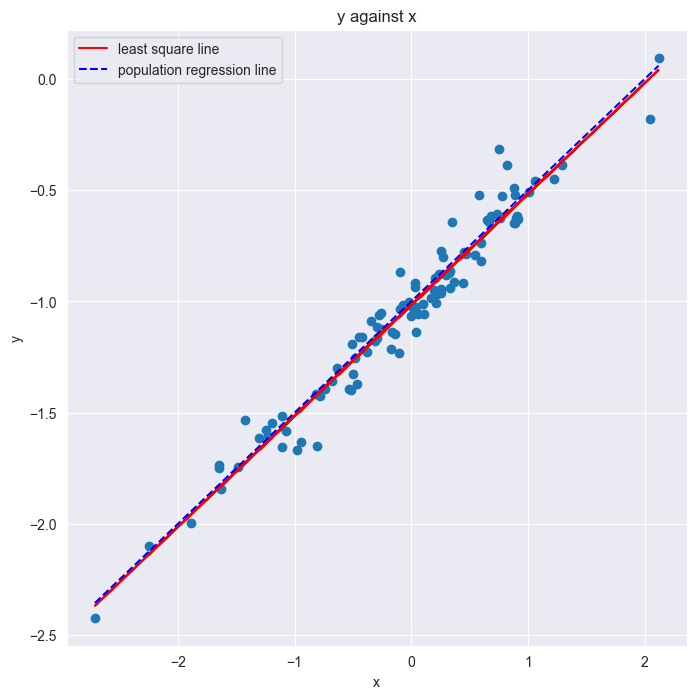

In [308]:
# repeat a-f with less noise in the data
eps_h = rng.normal(loc=0, scale=0.1, size=100)
y_13_h = -1 + 0.5 * x_13 + eps_h

# fit a least squares line to predict y using x
model_13_h = sm.OLS(y_13_h, x_13_a).fit()
display(model_13_h.summary())

bi_true = (-1, 0.5)
bi_estimate = model_13_h.params
plot_scatter_simple_linear(x_13, y_13_h, bi_estimate=bi_estimate, bi_true=bi_true);

### 13.h

By reducing the noise in the response **y**, the obtained least squares linear model has better explainability power for the response **y** and captures more accurately the correlation between the predictor **x** and response **y**

The model demonstrates strong explanatory power and high statistical significance. In particular:
* The R squared values is 0.936, indicating that the model can explain 93.6% of the variance in the response **y**. This is an improvement compared to the simple linear model where there is more noise in the response **y** (R squared values equals 0.741).
* The F-statistic value is high (1437) and has a low p-value (2.33e-60). The t-statistic values of the 2 coefficients $\hat{\beta_0}$ and $\hat{\beta_1}$ are far from 0 (-92.684 and 37.910 respectively) with low p-values (virtually 0). Furthermore, the respective confidence interval of these two coefficients don't contain the value 0. These signs strongly reject the null hypothesis that $\hat{\beta_i} = 0$.

The estimated coefficients of the model are remarkably close to their true values:
* $\hat{\beta_0} = -1.0104$, which is relatively close to the true value -1. Its 95% confidence interval is \[-1.032, -0.989], which include the true value -1.
* Similarly, $\hat{\beta_1} = 0.4935$, which is relatively close to the true value 0.5. Its 95% confidence interval is \[0.458, 0.509], which include the true value 0.5.

The values of $\hat{\beta_0}$ and $\hat{\beta_1}$ being close $\beta_0$ and $\beta_1$ respectively indicates that while the model accounts is susceptible to variance in the response **y**, since the variance is relatively low, it doesn't significantly divert the model from capturing the true relationship between the predictor and the response **y**.

In the scatter plot of y against x, the least squares line and the population regression line are very close to one another, confirming that the model accurately captures the relationship between predictor **x** and response **y**.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     125.7
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           2.93e-19
Time:                        10:34:03   Log-Likelihood:                -57.792
No. Observations:                 100   AIC:                             119.6
Df Residuals:                      98   BIC:                             124.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0046      0.044    -22.974      0.000      -1.091      -0.918
x1             0.5735      0.051     11.210      0.000       0.472       0.675
==============================================================================
Omnibus:                        0.859   Durbin-Watson:                   2.355
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.930
Skew:                          -0.118   Prob(JB):                        0.628
Kurtosis:                       2.591   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

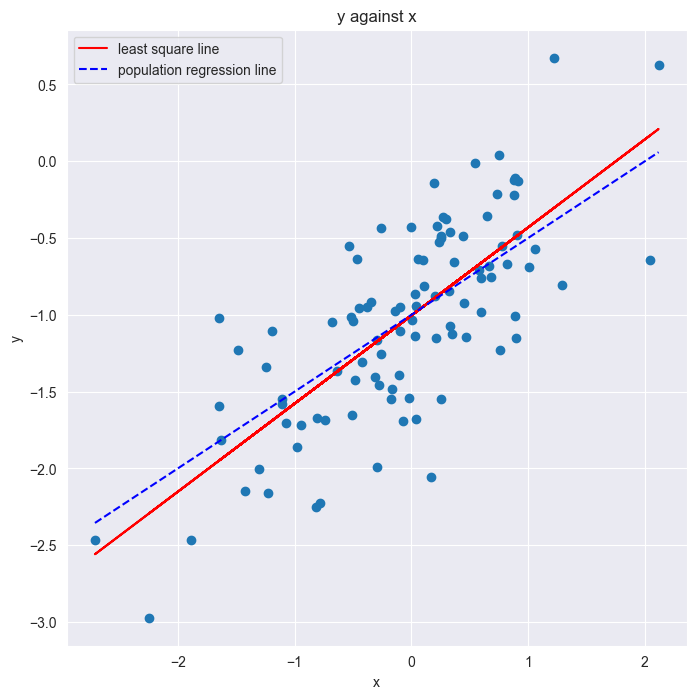

In [309]:
# repeat a-f with more noise in the data
eps_i = rng.normal(loc=0, scale=0.5, size=100)
y_13_i = -1 + 0.5 * x_13 + eps_i

# fit a least squares line to predict y using x
model_13_i = sm.OLS(y_13_i, x_13_a).fit()
display(model_13_i.summary())

bi_true = (-1, 0.5)
bi_estimate = model_13_i.params
plot_scatter_simple_linear(x_13, y_13_i, bi_estimate=bi_estimate, bi_true=bi_true);

### 13.i

By increasing the noise in the response **y**, the obtained least squares linear model has poorer explainability power for the response **y** and captures less accurately the correlation between the predictor **x** and response **y**

The model demonstrates less explanatory power and less statistical significance. In particular:
* The R squared values is 0.404, indicating that the model can explain 40.4% of the variance in the response **y**. This is a decrease compared to the simple linear model in part **a** where there is less noise in the response **y** (R squared values equals 0.741).
* The F-statistic value is high (66.38) and has a low p-value (1.23e-12). However, it is lower than the other simple linear model with less noise in the response **y** in part **a**. The t-statistic values of the 2 coefficients $\hat{\beta_0}$ and $\hat{\beta_1}$ are far from 0 (-21.143 and 8.147 respectively) with low p-values (virtually 0). Furthermore, the respective confidence interval of these two coefficients don't contain the value 0. These signs strongly reject the null hypothesis that $\hat{\beta_i} = 0$.

The estimated coefficients of the model are still remarkably close to their true values:
* $\hat{\beta_0} = -1.0368$, which is relatively close to the true value -1. Its 95% confidence interval is \[-1.134, -0.940], which include the true value -1.
* Similarly, $\hat{\beta_1} = 0.4675$, which is relatively close to the true value 0.5. Its 95% confidence interval is \[0.354, 0.581], which include the true value 0.5.

The values of $\hat{\beta_0}$ and $\hat{\beta_1}$ being close $\beta_0$ and $\beta_1$ respectively indicates that while the model accounts is susceptible to variance in the response **y**, since the variance is low, it doesn't significantly divert the model from capturing the true relationship between the predictor and the response **y**.

In the scatter plot of y against x, the least squares line and the population regression line are very close to one another, confirming that the model accurately captures the relationship between predictor **x** and response **y**.

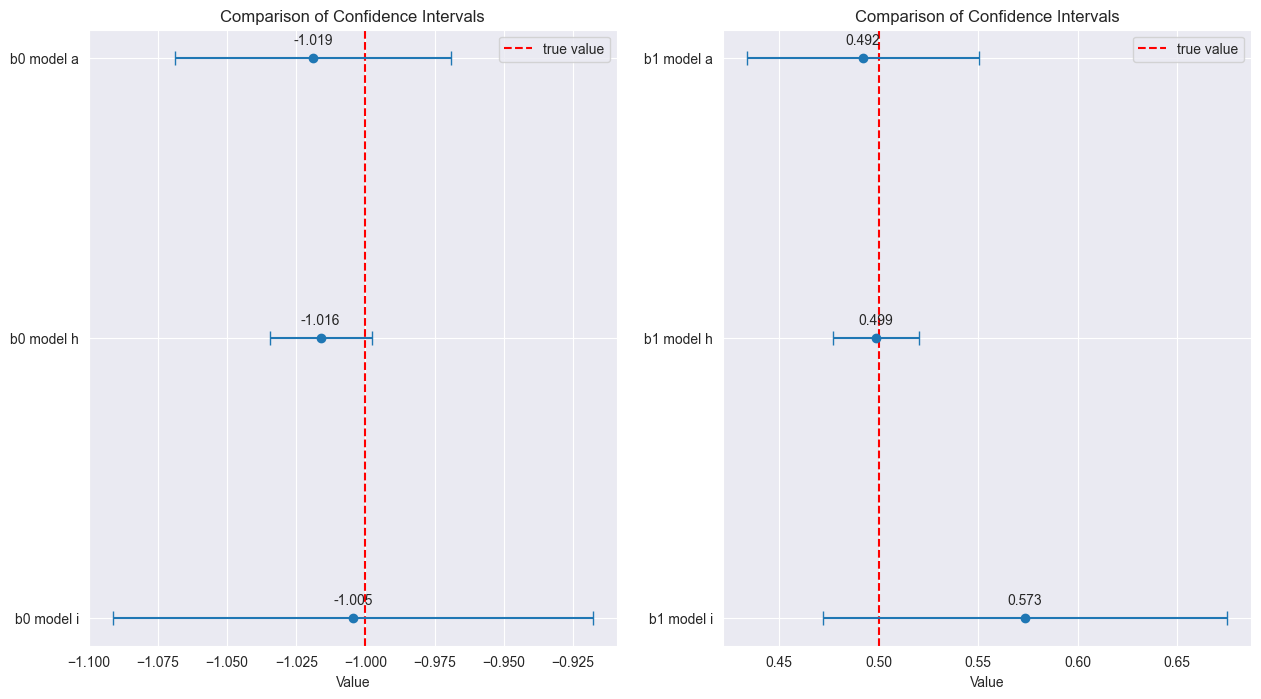

In [310]:
# define helper function to draw confidence intervals
def plot_coefficient_interval(data, true_val=None, subplot=None):
    """
    Plot coefficient interval.
    Parameters:
        data (Dict): a dictionary with keys is 'bi model <name>', value is a tuple [coefficient, lower_bound, upper_bound]
        subplot (List(Figure, Axes)): figure and axes objects to plot
    :return:
    """
    if subplot is None:
        fig, ax = plt.subplots(1,1, figsize=(8,8))
    else:
        fig, ax = subplot

    # plot the vertical line of true bi value
    if true_val is not None:
        ax.axvline(true_val, color='r', linestyle='--', label=f'true value')

    # Extract the point estimates and confidence interval errors
    points = [val[0] for val in data.values()]
    # The error is the difference between the bounds and the point estimate
    lower_errors = [val[0] - val[1] for val in data.values()]
    upper_errors = [val[2] - val[0] for val in data.values()]
    asymmetric_error = [lower_errors, upper_errors]

    # The y-positions for the horizontal lines
    y_pos = np.arange(len(data), 0, -1)

    # Plot the horizontal confidence intervals
    ax.errorbar(points, y_pos, xerr=asymmetric_error, fmt='o', capsize=5)

    # Annotate data points with their values
    for i, txt in enumerate(points):
        ax.annotate(f'{txt:.3f}', (points[i], y_pos[i]), textcoords="offset points", xytext=(0,10), ha='center')

    # Set the y-axis labels to the point names
    ax.set_yticks(y_pos)
    ax.set_yticklabels(data.keys())

    # Add labels and title
    ax.set_xlabel("Value")
    ax.set_title("Comparison of Confidence Intervals")
    ax.legend()

    return fig, ax

# retrieve 95% confidence interval for bi
models = [model_13_a, model_13_h, model_13_i]
keys = ('a', 'h', 'i')
bi_dicts = [dict(), dict()]
bi = [f'b{i}' for i in range(2)]
for i, bi_dict in zip(range(len(bi_dicts)), bi_dicts):
    for model, key in zip(models, keys):
        bi_dict[f'{bi[i]} model {key}'] = [model.params[i], * model.conf_int(alpha=0.05)[i]]

# plot the 95% confidence interval
fig, ax = plt.subplots(1,2, figsize=(15,8))

plot_coefficient_interval(data=bi_dicts[0], true_val=-1, subplot=(fig, ax[0]))
plot_coefficient_interval(data=bi_dicts[1], true_val=0.5, subplot=(fig, ax[1]));


### 13.j

The noise in the models are generated following a normal distribution centering at 0 and has variance:
* model a: 0.25
* model h: 0.1
* model i: 0.5
* model h < model a < model i

The figure showing the comparison of confidence intervals of b0 and b1 between 3 models show tha the noisier the data is, i.e. the higher the variance, the larger the 95% confidence interval of the coefficients.

## Question 14

In [311]:
rng = np.random.default_rng(10)
x1_a = rng.uniform(0, 1, size=100)
x2_a = 0.5 * x1_a + rng.normal(size=100)/10
y_14_a = 2 + 2 * x1_a + 0.3 * x2_a + rng.normal(size=100)

### 14.a

The form of the linear model: $y = \beta_0 + \beta_1 * x_1 + \beta_2 * x_2 + \epsilon$ <br>Where:
* $\beta_0 = 2$
* $\beta_1 = 2$
* $\beta_2 = 0.3$

### 14.b

There is a linear correlation between x1 and x2, where $x_2 = 0.5 * x_1 + \epsilon'$.

Applying this correlation into the function of **y**, and omitting $\epsilon'$ for simplicity, we obtain the following:

* replacing $x_2 = 0.5 * x_1$ into the function: <br>
$y = \beta_0 + \beta_1 * x_1 + \beta_2 * x_2 + \epsilon$ <br>
$y = \beta_0 + \beta_1 * x_1 + \beta_2 * 0.5 * x_1 + \epsilon$ <br>
$y = \beta_0 + (\beta_1 + 0.5 * \beta_2) * x_1 + \epsilon$ <br>
$y = 2 + (2 + 0.5 * 0.3) * x_1 + \epsilon$ <br>
$y = 2 + 2.15 * x_1 + \epsilon$ <br>
* replacing $x_1 = \frac{1}{0.5} * x_2 = 2 * x_2$ into the function: <br>
$y = \beta_0 + \beta_1 * x_1 + \beta_2 * x_2 + \epsilon$ <br>
$y = \beta_0 + \beta_1 * 2 * x_2 + \beta_2 * x_2 + \epsilon$ <br>
$y = \beta_0 + (2 * \beta_1 + \beta_2) * x_2 + \epsilon$ <br>
$y = 2 + (2 * 2 + 0.3) * x_2 + \epsilon$ <br>
$y = 2 + 4.3 * x_2 + \epsilon$ <br>

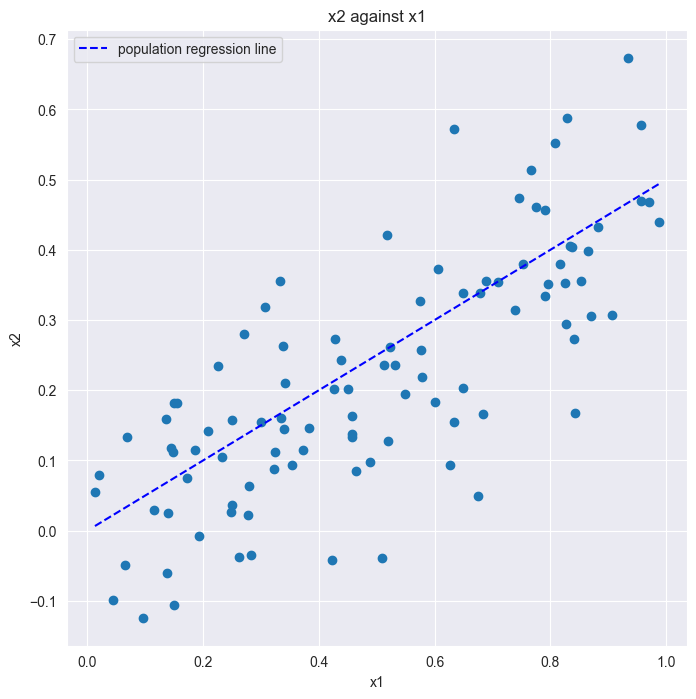

In [312]:
# plot a scatter plot between x1 and x2 with the population regression line
fig, ax = plt.subplots(1,1, figsize=(8,8))

plot_scatter_simple_linear(x1_a, x2_a, bi_true = [0.0, 0.5], subplot=(fig, ax))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('x2 against x1');

In [313]:
# fit a least square regression to predict y using x1 and x2

# create predictor matrix X: constant, x1, x2
x_14_c = np.insert(x1_a.reshape(x1_a.shape[0], 1), 0, np.ones(x1_a.shape), axis=1)
x_14_c = np.insert(x_14_c, x_14_c.shape[1], x2_a, axis=1)

model_14_c = sm.OLS(y_14_a, x_14_c).fit()
display(model_14_c.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           5.76e-08
Time:                        10:34:03   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 14.c

The obtained model doesn't offer sufficient explanatory power over the data. Additionally, it fails to capture the accurate relationship between the response **y** and predictors **x1** or **x2**. This failure is due to the multicollinearity between **x1** or **x2**. The symptoms are described as follows.

The R squared value is relatively low (0.291), indicating that the model can only account for around 29.1% of variance in the response **y**.

While the F-statistic value (19.89) and its p-value being low (5.76e-8) rejects the null hypothesis that $\beta_i = 0$, a closer look at the t-statistic test indicates otherwise.
* For **x1**, t-statistic is 3.065 with a low p-value (0.003). Its confidence interval is in the range \(0.569, 2.661), which exclude the value 0. This rejects the null hypothesis $\beta_1 = 0$.
* However, this is not the case for **x2**. Its t-statistic is relatively low (1.134) with a high p-value (0.259). Its confidence interval is in the range \(-0.707, 2.592), which include the value 0. These signs reject the hypothesis that $\beta_2 \neq 0$.

The estimated coefficients are also far from their true value.
* $\hat{\beta_0} = 1.9579$, which is relatively close to the true value 2. Additionally, the standard error is relatively low. Its confidence interval is \(1.581, 2.334), which contain the true value 2.
* $\hat{\beta_1} = 1.6154$. Additionally, its standard error is relatively high (0.527) in relation to its value. Its confidence interval is \(0.569, 2.661). Although its confidence interval contains the true value 2, its value is relatively far from it.
* $\hat{\beta_2} = 0.9428$. Additionally, its standard error is relatively high (0.831) in relation to its value. Its confidence interval is \(-0.707, 2.592). Although its confidence interval contains the true value 0.3, its value is relatively far from it.

In [314]:
# fit a least square regression to predict y using x1

# create predictor matrix X: constant, x1
x_14_d = np.insert(x1_a.reshape(x1_a.shape[0], 1), 0, np.ones(x1_a.shape), axis=1)

model_14_d = sm.OLS(y_14_a, x_14_d).fit()
display(model_14_d.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           1.37e-08
Time:                        10:34:03   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 14.d

The obtained model doesn't offer sufficient explanatory power over the data. It does, however, satisfactorily captures the relationship between the response **y** and predictors **x1**.

The R squared value is relatively low (0.281), indicating that the model can only account for around 28.1% of variance in the response **y**. This is a decrease of 1% from **model d**, which includes the predictor **x2**. This decrease is potentially due to the decrease in the model's degree of freedom (i.e. number of predictors), as R squared value tend to increase with the addition of new predictors.

The F-statistic value is high (38.39) with significantly low p-value (1.37e-8), which is an improvement compared to those of **model d**. Additionally, the t-statistic values of the coefficient $\hat{\beta_1}$ is high (6.196) with very low p-value (0.000). The confidence interval of the coefficient $\hat{\beta_1}$ is \(1.412, 2.742), which excludes the value 0. These signs strongly reject the null hypothesis that $\beta_1 = 0$.

The values of $\hat{\beta_i}$ are relatively close to their true values with high confidence:
* The value of $\hat{\beta_0}$ is 1.9371, which is relatively close to its true value 2. The standard error value is relatively low (0.189) relative to the value of $\hat{\beta_0}$. Additionally, the confidence interval of the coefficient $\hat{\beta_0}$ is \(1.562, 2.312), which includes the true value 2.
* The value of $\hat{\beta_1}$ is 2.0771, which is relatively close to its true value 2.15. The standard error value is relatively low (0.335) relative to the value of $\hat{\beta_1}$. Additionally, the confidence interval of the coefficient $\hat{\beta_1}$ includes the true value 2.15.

The slightly weaker explanatory power and the significant improvement in the correlational relationship between the predictors and response **y** indicates that although the elimination of multicollinearity result in more coherent relationship, it doesn't automatically equate to improved explanatory power. The noise in the response **y** is the main factor reducing the explanatory power of the model. Put differently, by eliminating multicollinearity, the obtained model better captures the relationship between the predictors and the response **y** at the negligible cost of explanatory power (1% in this case).

In [315]:
# fit a least square regression to predict y using x2

# create predictor matrix X: constant, x2,
x_14_e = np.insert(x2_a.reshape(x2_a.shape[0], 1), 0, np.ones(x2_a.shape), axis=1)

model_14_e = sm.OLS(y_14_a, x_14_e).fit()
display(model_14_e.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           7.43e-07
Time:                        10:34:03   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.000       2.019       2.629
x1             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 14.e, 14.f

The obtained model doesn't offer sufficient explanatory power over the data. It doesn't satisfactorily capture the relationship between the response **y** and predictors **x2** either.

The R squared value is relatively low (0.222), indicating that the model can only account for around 22.2% of variance in the response **y**. This is a decrease of 6.9% from **model d**, which includes the predictor **x1**. This decrease is potentially due to the decrease in the model's degree of freedom (i.e. number of predictors), as R squared value tend to increase with the addition of new predictors. Additionally, this is a decrease of 5.9% from **model e**, which includes the predictor x1 but not predictor **x2**. This reduction in explanatory power is potentially due to the fact that **x2** is generated from **x1** with added variance. So, the resulting variance in the response **y** when mapped from **x2** is compounded by the inherent variance in **x2** as well as its own inherent variance. As variance increases, it masks the true correlation between the predictor **x2** and the response **y**, reducing the explanatory power of the model.

The F-statistic value is high (27.99) with significantly low p-value (7.43e-7), which is an improvement compared to those of **model d**. Additionally, the t-statistic values of the coefficient $\hat{\beta_1}$ is high (5.291) with very low p-value (0.000). The confidence interval of the coefficient $\hat{\beta_1}$ is \(1.819, 4.002), which excludes the value 0. These signs strongly reject the null hypothesis that $\beta_1 = 0$.

The values of $\hat{\beta_i}$ are close, albeit not enough, to their true values:
* The value of $\hat{\beta_0}$ is 2.3239, which is relatively close to its true value 2. The standard error value is relatively low (0.154) relative to the value of $\hat{\beta_0}$. Additionally, the confidence interval of the coefficient $\hat{\beta_0}$ is \(2.019, 2.629), which narrowly misses the true value 2.
* The value of $\hat{\beta_1}$ is 2.9103, which is relatively far from its true value 4.3. The standard error value is low (0.550) relative to the value of $\hat{\beta_1}$. Additionally, the confidence interval of the coefficient $\hat{\beta_1}$ narrowly misses the true value 4.3.

The weaker explanatory power and the significant improvement in the correlational relationship between the predictors and response **y** indicates that although the elimination of multicollinearity result in more coherent relationship, it doesn't automatically equate to improved explanatory power. The noise in the response **y** is the main factor reducing the explanatory power of the model. Put differently, by eliminating multicollinearity, the obtained model better captures the relationship between the predictors and the response **y** at the negligible cost of explanatory power (6.9% in this case). Nevertheless, given that the explanatory power and the accuracy of the captured relationship in **model e** is worse than **model d**, the variance in the predictor **x2** does statistically affect the model in undesirable way. This means that in reducing multicollinearity, it is important to identify predictors for elimination with less variance for a desirable trade-off between reduced explanatory power and improved accuracy in correlation of response and predictors.

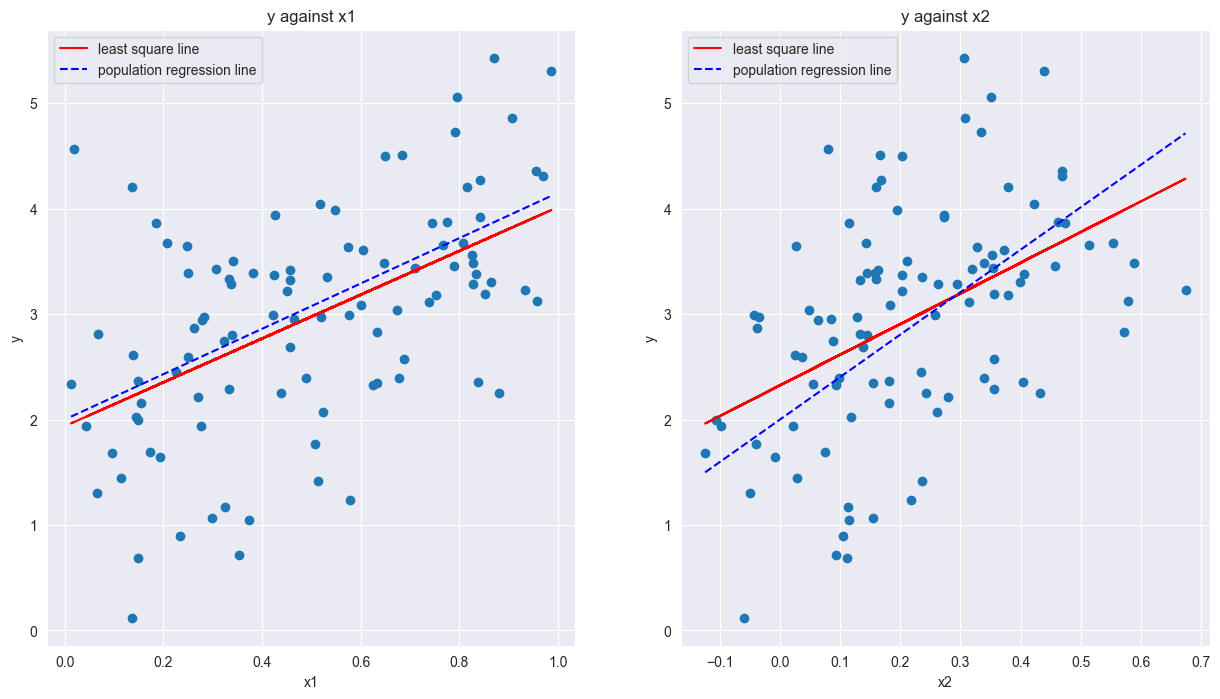

In [316]:
# plot scatter plots of y against x1 and y against x2 with the least regression line and the population regression line of the 2 models in d and e respectively.
fig, ax = plt.subplots(1,2, figsize=(15,8))

for xi, b1, predictor, model, ax_i in zip((x1_a, x2_a), (2.15, 4.03), ('x1', 'x2'), (model_14_d, model_14_e), ax):
    plot_scatter_simple_linear(xi, y_14_a, bi_estimate=model.params, bi_true=(2, b1), subplot=(fig, ax_i))
    ax_i.set_xlabel(f'{predictor}')
    ax_i.set_ylabel('y')
    ax_i.set_title(f'y against {predictor}');

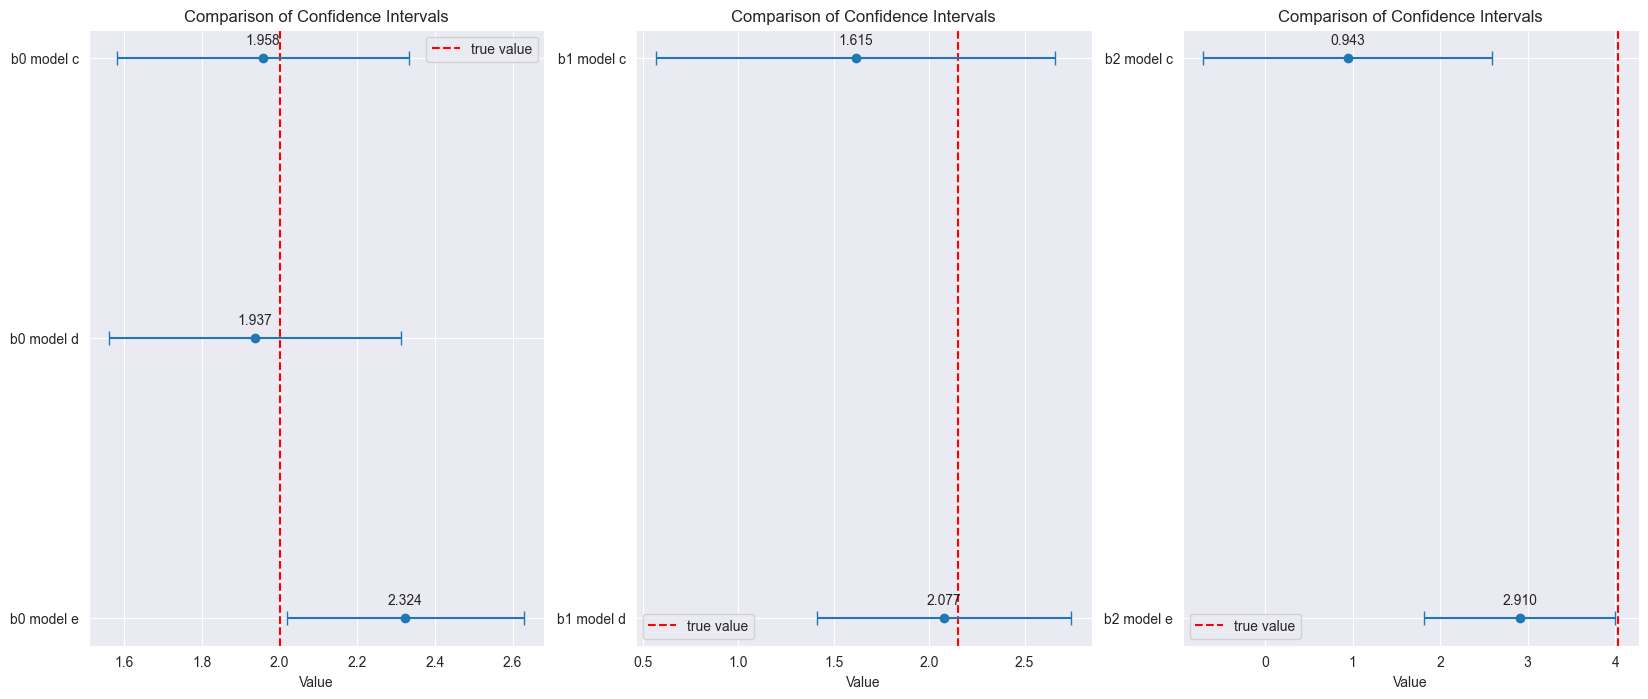

In [317]:
# retrieve 95% confidence interval for bi
keys = ('c', 'd', 'e')
bi_dicts = [dict(), dict(), dict()]
bi = [f'b{i}' for i in range(1,3)]

for key, model in zip(keys, (model_14_c, model_14_d, model_14_e)):
    bi_dicts[0][f'b0 model {key}'] = [model.params[0], * model.conf_int(alpha=0.05)[0]]

for i in range(1, 3):
    bi_dicts[i][f'b{i} model c'] = [model_14_c.params[i], * model_14_c.conf_int(alpha=0.05)[i]]

for i, model in zip(range(1, 3), (model_14_d, model_14_e)):
    bi_dicts[i][f'b{i} model {keys[i]}'] = [model.params[1], * model.conf_int(alpha=0.05)[1]]

# plot the 95% confidence interval
fig, ax = plt.subplots(1,3, figsize=(20,8))

for bi_dict, true_bi, ax_i in zip(bi_dicts, (2, 2.15, 4.03), ax):
    plot_coefficient_interval(data=bi_dict, true_val=true_bi, subplot=(fig, ax_i))

In [318]:
# add 1 observation to the data
x1_g = np.concatenate([x1_a, [0.1]])
x2_g = np.concatenate([x2_a, [0.8]])
y_14_g = np.concatenate([y_14_a, [6]])
label_type = np.concatenate([np.full(x1_a.shape, 'original'), ['new observation']])

# create predictor matrix for model c: constant, x1, x2
x_14_g_c = np.insert(x1_g.reshape(x1_g.shape[0], 1), 0, np.ones(x1_g.shape), axis=1)
x_14_g_c = np.insert(x_14_g_c, x_14_g_c.shape[1], x2_g, axis=1)

# create predictor matrix for model d: constant, x1
x_14_g_d = np.insert(x1_g.reshape(x1_g.shape[0], 1), 0, np.ones(x1_g.shape), axis=1)

# create predictor matrix for model e: constant, x2
x_14_g_e = np.insert(x2_g.reshape(x2_g.shape[0], 1), 0, np.ones(x2_g.shape), axis=1)

# Refit model c, d, e with the added observation
models_14_g = [sm.OLS(y_14_g, xi).fit() for xi in [x_14_g_c, x_14_g_d, x_14_g_e]]

for model, predictor in zip(models_14_g, ['x1 and x2', 'x1', 'x2']):
    print('\n'*2 + '#'*50 + '\n'*2 + f'Linear regression model predicting response y using predictors: {predictor}')
    display(model.summary())



##################################################

Linear regression model predicting response y using predictors: x1 and x2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           4.60e-08
Time:                        10:34:04   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.192     10.720      0.000       1.680       2.443
x1             0.8575      0.466      1.838      0.069      -0.068       1.783
x2             2.2663      0.705      3.216      0.002       0.868       3.665
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.320
Skew:                           0.013   Prob(JB):                        0.852
Kurtosis:                       2.725   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



##################################################

Linear regression model predicting response y using predictors: x1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           9.23e-07
Time:                        10:34:04   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0739      0.201     10.310      0.000       1.675       2.473
x1             1.8760      0.358      5.236      0.000       1.165       2.587
==============================================================================
Omnibus:                        8.232   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.781
Skew:                           0.396   Prob(JB):                      0.00456
Kurtosis:                       4.391   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



##################################################

Linear regression model predicting response y using predictors: x2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           3.13e-08
Time:                        10:34:04   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2840      0.151     15.088      0.000       1.984       2.584
x1             3.1458      0.524      6.008      0.000       2.107       4.185
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.631
Skew:                          -0.041   Prob(JB):                        0.729
Kurtosis:                       2.621   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

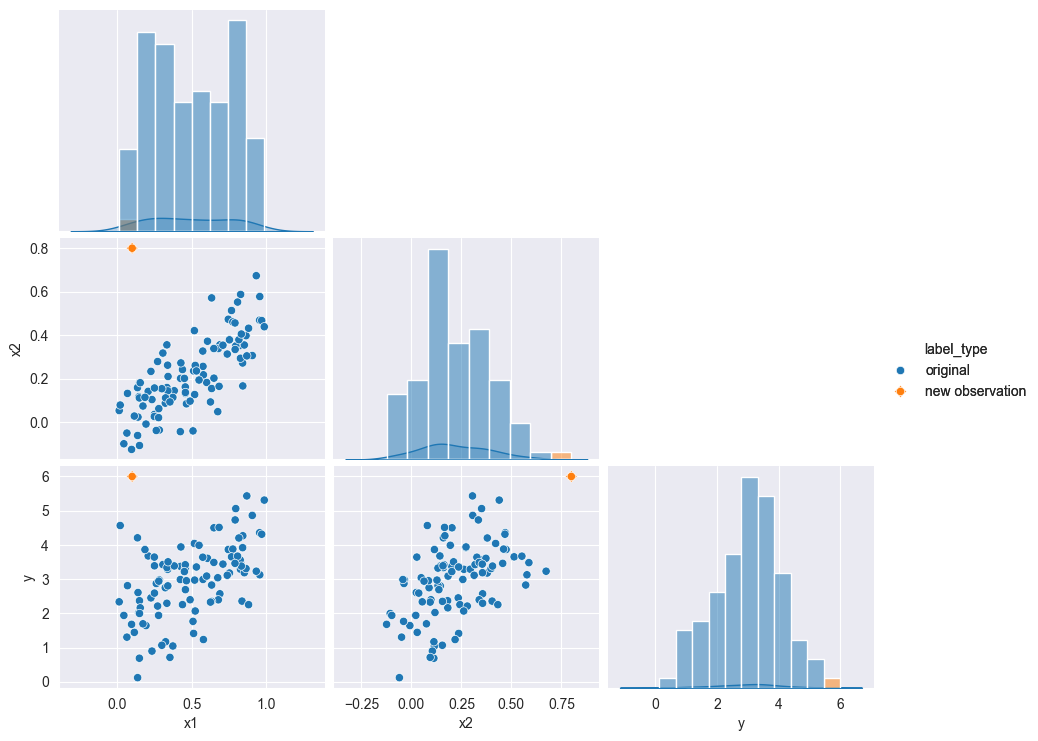

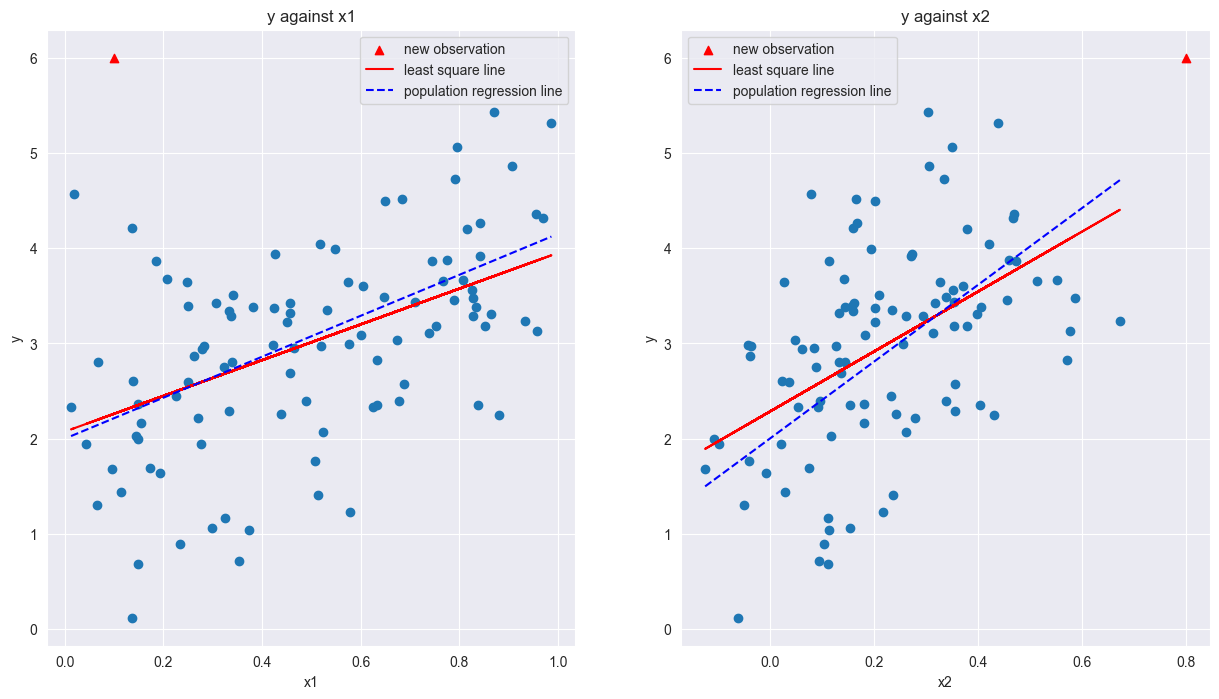

In [319]:
# plot the pairplots of predictors x1, x2 and response y
grid = sns.pairplot(pd.DataFrame({'x1': x1_g, 'x2': x2_g, 'y': y_14_g, 'label_type': label_type}), corner=True, hue='label_type', markers=["o", "D"])
grid.map_lower(sns.scatterplot)
grid.map_diag(sns.histplot)
grid.add_legend()

# plot scatter plots of y against x1 and y against x2 with the least regression line and the population regression line of the 2 models in d and e respectively.
fig, ax = plt.subplots(1,2, figsize=(15,8))

for xi, xi_new, b1, predictor, model, ax_i in zip((x1_a, x2_a), (x1_g[len(x1_g)-1], x2_g[len(x2_g)-1]), (2.15, 4.03), ('x1', 'x2'), models_14_g[1:], ax):
    ax_i.scatter(xi_new, y_14_g[len(y_14_g)-1], marker='^', color='red', label='new observation')
    plot_scatter_simple_linear(xi, y_14_a, bi_estimate=model.params, bi_true=(2, b1), subplot=(fig, ax_i))
    ax_i.set_xlabel(f'{predictor}')
    ax_i.set_ylabel('y')
    ax_i.set_title(f'y against {predictor}')
    ax_i.legend();

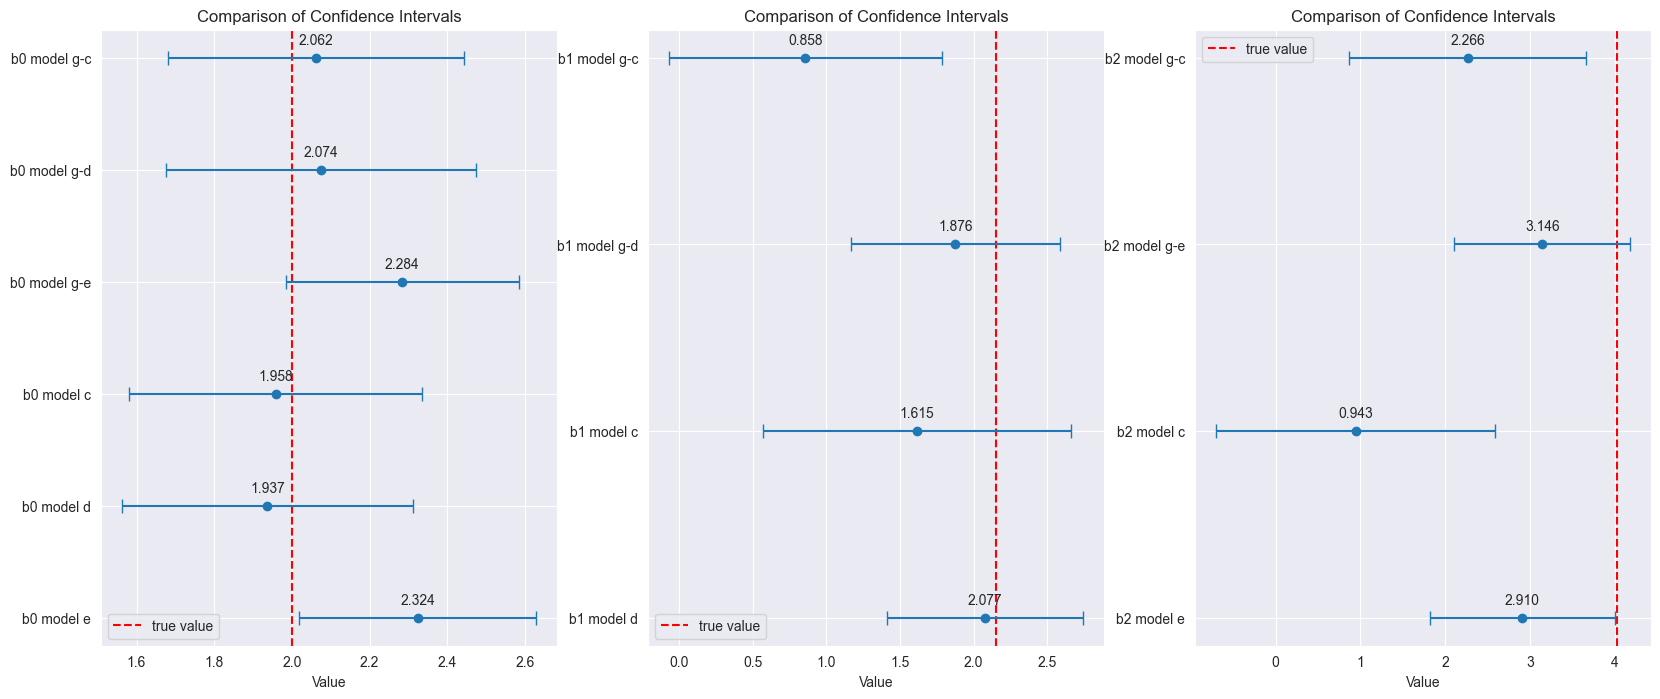

In [320]:
# retrieve 95% confidence interval for bi
keys = ('c', 'd', 'e')
bi_dicts = [dict(), dict(), dict()]
bi = [f'b{i}' for i in range(1,3)]

# model g-c, g-d, g-e
for key, model in zip(keys, models_14_g):
    bi_dicts[0][f'b0 model g-{key}'] = [model.params[0], * model.conf_int(alpha=0.05)[0]]

for i in range(1, 3):
    bi_dicts[i][f'b{i} model g-c'] = [models_14_g[0].params[i], * models_14_g[0].conf_int(alpha=0.05)[i]]

for i in range(1, 3):
    bi_dicts[i][f'b{i} model g-{keys[i]}'] = [models_14_g[i].params[1], * models_14_g[i].conf_int(alpha=0.05)[1]]

# model c, d, e
for key, model in zip(keys, (model_14_c, model_14_d, model_14_e)):
    bi_dicts[0][f'b0 model {key}'] = [model.params[0], * model.conf_int(alpha=0.05)[0]]

for i in range(1, 3):
    bi_dicts[i][f'b{i} model c'] = [model_14_c.params[i], * model_14_c.conf_int(alpha=0.05)[i]]

for i, model in zip(range(1, 3), (model_14_d, model_14_e)):
    bi_dicts[i][f'b{i} model {keys[i]}'] = [model.params[1], * model.conf_int(alpha=0.05)[1]]

# plot the 95% confidence interval
fig, ax = plt.subplots(1,3, figsize=(20,8))

for bi_dict, true_bi, ax_i in zip(bi_dicts, (2, 2.15, 4.03), ax):
    plot_coefficient_interval(data=bi_dict, true_val=true_bi, subplot=(fig, ax_i))

### 14.g

The PairPlot of **x1**, **x2** and **y**, and the scatter plots of **y against x1** and **y against x2** with the least square lines and the population regression lines show that the new observation is both a point with high leverage and an outlier. In particular:
* The scatter plot **x2 against x1** shows that the new observation is far from the cluster of original observations. It is also far from the trend-line of the data distribution. These signs indicate that the new observation has irregular \(x1, x2) value. So, the new observation is a high leverage point.
* The scatter plot **y against x2** shows that the new observation is far from the cluster of original observations. However, this point is still close to the extended trend line of the data distribution. These signs indicate that in the **x2** dimension, the new observation is a high leverage point.
* The scatter plot **y against x1** shows that the new observation is far from the cluster of original observations. Additionally, it is far from the trend line of the data distribution, indicating that in the **x1** dimension, the new observation is an outlier.


The obtained models are as follows:
* model_14_g_c (i.e. model g-c): predictors **x1** and **x2**
* model_14_g_d (i.e. model g-d): predictor **x1**
* model_14_g_e (i.e. model g-e): predictor **x2**

The R-squared and the F-statistic values of the models are as follows:

| Model | R-squared | Adjusted R-squared | F-statistic | F-stats p-value |
|-------|-----------|--------------------|-------------|-----------------|
| g-c   | 0.292     | 0.277              | 20.173      | 4.600e-8        |
| g-d   | 0.217     | 0.209              | 27.416      | 9.233e-7        |
| g-e   | 0.267     | 0.260              | 36.098      | 3.128e-8        |
| c     | 0.291     | 0.276              | 19.894      | 5.757e-8        |
| d     | 0.281     | 0.274              | 38.388      | 1.368e-8        |
| e     | 0.222     | 0.214              | 27.993      | 7.430e-7        |

The R-squared values of the models **g-c**, **g-d**, **g-e** are shown in the above table. The new observation doesn't have significant impact on the explanatory power of **model g-c** relative to **model c**, but noticeably affects the explanatory power of **model g-d** and **g-e** relative to **model d** and **model e**. In particular, the R-squared value of **model g-c** is 0.292, which means that the model can explain approximately 29.2% of the variance in response **y**. This values approximately equals that of **model c**. As the number of predictor decreases, so do the R-squared values of **model g-d** and **model g-e** relative to **model g-c**. However, while the R-squared values of **model d** (0.281) is greater than that of **model e** (0.222), the reverse is true for **model g-d** (0.217) and **model g-e** (0.267). In other words, **model g-d** can explain 5% less variance in the **response y** in comparison to **model g-e**. This is due to the fact that in the x1 dimension, the new observation is an outlier. So, as **model g-d** uses only predictor **x1**, the new observation significantly decreases the model's explanatory power. On the other hand, in the **x2** dimension, the new observation is a high leverage point. As **model g-e** uses only predictor **x2**, not only that the impact of the outlier in the **x1** dimension is mitigated, the new observation reduces uncertainty and confirm the trend for **model g-e**

The trend of the F-statistic values of models **g-c**, **g-d**, **g-e** are in accordance with the R-squared values of these models. All 3 F-statistic values are high with low p-values strongly reject the null hypothesis $H_0: \beta_i = 0$. The F-statistic of **model g-c** is the lowest due to multicollinearity. By using only one predictor, multicollinearity is eliminated in **model g-d** and **model g-e**, making the explained variance per model degree of freedom over the total variance per data degree of freedom increases. Put differently, while the overall explanatory power of the model is decreased with the reduced number of predictors, the predictor used in **model g-d** and **model g-e** can better explain the variance in **response y**. The F-statistic of **model g-d** is lower than that of **model g-e** indicates that the new observation adds significantly more variance to the **response y** in the **x1** dimension than the **x2** dimension, so much so that it is stronger than the inherent variance in **x2** to make **model g-e** better explains the variance in **response y** than **model g-d**.

The t-statistic tests of models **g-c**, **g-d**, **g-e** shows similar patterns to the those of models **c**, **d**, **e**. The plots comparing the estimated coefficients values, their 95% confidence intervals and their true values illustrate the t-statistic tests.
* In **model g-c**, the estimated coefficients $\hat{\beta_1}$ and $\hat{\beta_2}$ are rather far from their true value. Their respective confidence intervals narrowly miss the true values. Due to multicollinearity, **model g-c** can't accurately capture the relationship of the predictors **x1**, **x2** and response **y**, similar to **model c**
* In **model g-d**, the estimated coefficient $\hat{\beta_1}$ (1.876) is closer to the true value of $\beta_1 = 2.15$ than **model g-c** (0.858) but is farther than that of **model d** (2.077). Its confidence interval shows similar behavior: narrower than that of **model g-c**, but wider than that of **model d**. These signs indicate that the new observation, by adding more variance to the data in the **x1** dimension, reduces the ability of the model to capture the true relationship between predictor **x1** and response **y**.
* In **model g-e**, the estimated coefficient $\hat{\beta_2}$ (3.146) is closer to the true value of $\beta_2 = 4.03$ than **model g-c** (2.266) and **model e** (2.910). Its confidence interval is narrower than that of **model g-c**, and approximately as wide as that of **model e**. Additionally, its confidence interval includes the true value 4.13, unlike those of **model g-c** and **model e**. These signs indicate that the new observation, as lying close to the extended population regression line of the plot **y against x2**, adds more information for the model to better capture the relationship between predictor **x2** and response **y**.

In summary, the new observation is a point with high leverage in the **x2** dimension as well as an outlier in the **x1** dimension relative to response **y**. As the new observation adds more variance to the **x1** dimension, it reduces the explanatory power of the model using only predictor **x1**. As it doesn't add more variance in the **x2** dimension, the model using only predictor **x2** has improved explanatory power than the one using only **x1**. However, although it reduces the explained variance in the model using only predictor **x1**, the model still captures the relationship of the predictor **x1** and the response **y** better than the model using only predictor **x2**. This implies that the added variance in predictor **x1** is still less than the inherent variance in predictor **x2**.

The performance of models **c**, **d**, **e**, **g-c**, **g-d**, **g-e** shows that in this case, to obtain an optimal point in explanatory power and accuracy in relationship between predictors and response, it is important to perform these following two steps (potentially iteratively):
1. Retain the predictors with less variance
2. Remove outliers in the chosen predictors

## Question 15

Dataset description: https://intro-stat-learning.github.io/ISLP/datasets/Boston.html

In [321]:
data_15 = load_data('Boston')
predictors_15 = data_15.columns.drop(['crim'])

# fit a simple linear regression model with each predictor
models_15_a = [sm.OLS(data_15['crim'], prepare_data(data_15, predictors=(predictor), add_intercept=True)).fit() for predictor in predictors_15]

In [322]:
def create_DataFrame_from_model_results(models, predictors):
    """ Create a pandas DataFrame holding the results of models
    Parameters:
        models (list[statsmodels.regression.linear_model.RegressionResultsWrapper]):
        predictors (list[str]): list of predictors
    Returns:
        DataFrame:
    """
    #Create a list to hold the summary results of each model
    results_list = []

    # Iterate through the models and predictors
    for i, model in enumerate(models):
        predictor_name = predictors[i]

        # Extract the required statistics
        r_squared = model.rsquared
        f_statistic = model.fvalue
        p_value_f = model.f_pvalue

        # Extract coefficients and related stats for the predictor
        coefficient = model.params[predictor_name]
        std_err = model.bse[predictor_name]
        t_statistic = model.tvalues[predictor_name]
        p_value_t = model.pvalues[predictor_name]

        # Extract the confidence interval for the predictor
        conf_int = model.conf_int().loc[predictor_name]

        # Append the results to the list
        results_list.append({
            'predictor': predictor_name,
            'R-squared': r_squared,
            'F-statistic': f_statistic,
            'p-value F-stats': p_value_f,
            'coefficient': coefficient,
            'standard error': std_err,
            't-statistic': t_statistic,
            'P>|t|': p_value_t,
            '0.025': conf_int[0],
            '0.975': conf_int[1]
        })

    # Create the pandas DataFrame
    results_df = pd.DataFrame(results_list).set_index('predictor')
    return results_df

results_df_15_a = create_DataFrame_from_model_results(models_15_a, predictors_15)
display(results_df_15_a)

,R-squared,F-statistic,p-value F-stats,coefficient,standard error,t-statistic,P>|t|,0.025,0.975
predictor,,,,,,,,,
zn,0.040188,21.102782,5.506472e-06,-0.073935,0.016095,-4.593776,5.506472e-06,-0.105556,-0.042314
indus,0.165310,99.817037,1.450349e-21,0.509776,0.051024,9.990848,1.450349e-21,0.409530,0.610023
chas,0.003124,1.579364,2.094345e-01,-1.892777,1.506115,-1.256727,2.094345e-01,-4.851815,1.066261
nox,0.177217,108.555329,3.751739e-23,31.248531,2.999190,10.418989,3.751739e-23,25.356076,37.140987
rm,0.048069,25.450204,6.346703e-07,-2.684051,0.532041,-5.044819,6.346703e-07,-3.729343,-1.638760
age,0.124421,71.619402,2.854869e-16,0.107786,0.012736,8.462825,2.854869e-16,0.082763,0.132809
dis,0.144149,84.887810,8.519949e-19,-1.550902,0.168330,-9.213458,8.519949e-19,-1.881617,-1.220187
rad,0.391257,323.935172,2.693844e-56,0.617911,0.034332,17.998199,2.693844e-56,0.550460,0.685362
tax,0.339614,259.190294,2.357127e-47,0.029742,0.001847,16.099388,2.357127e-47,0.026113,0.033372


In [323]:
type(models_15_a[0])

statsmodels.regression.linear_model.RegressionResultsWrapper

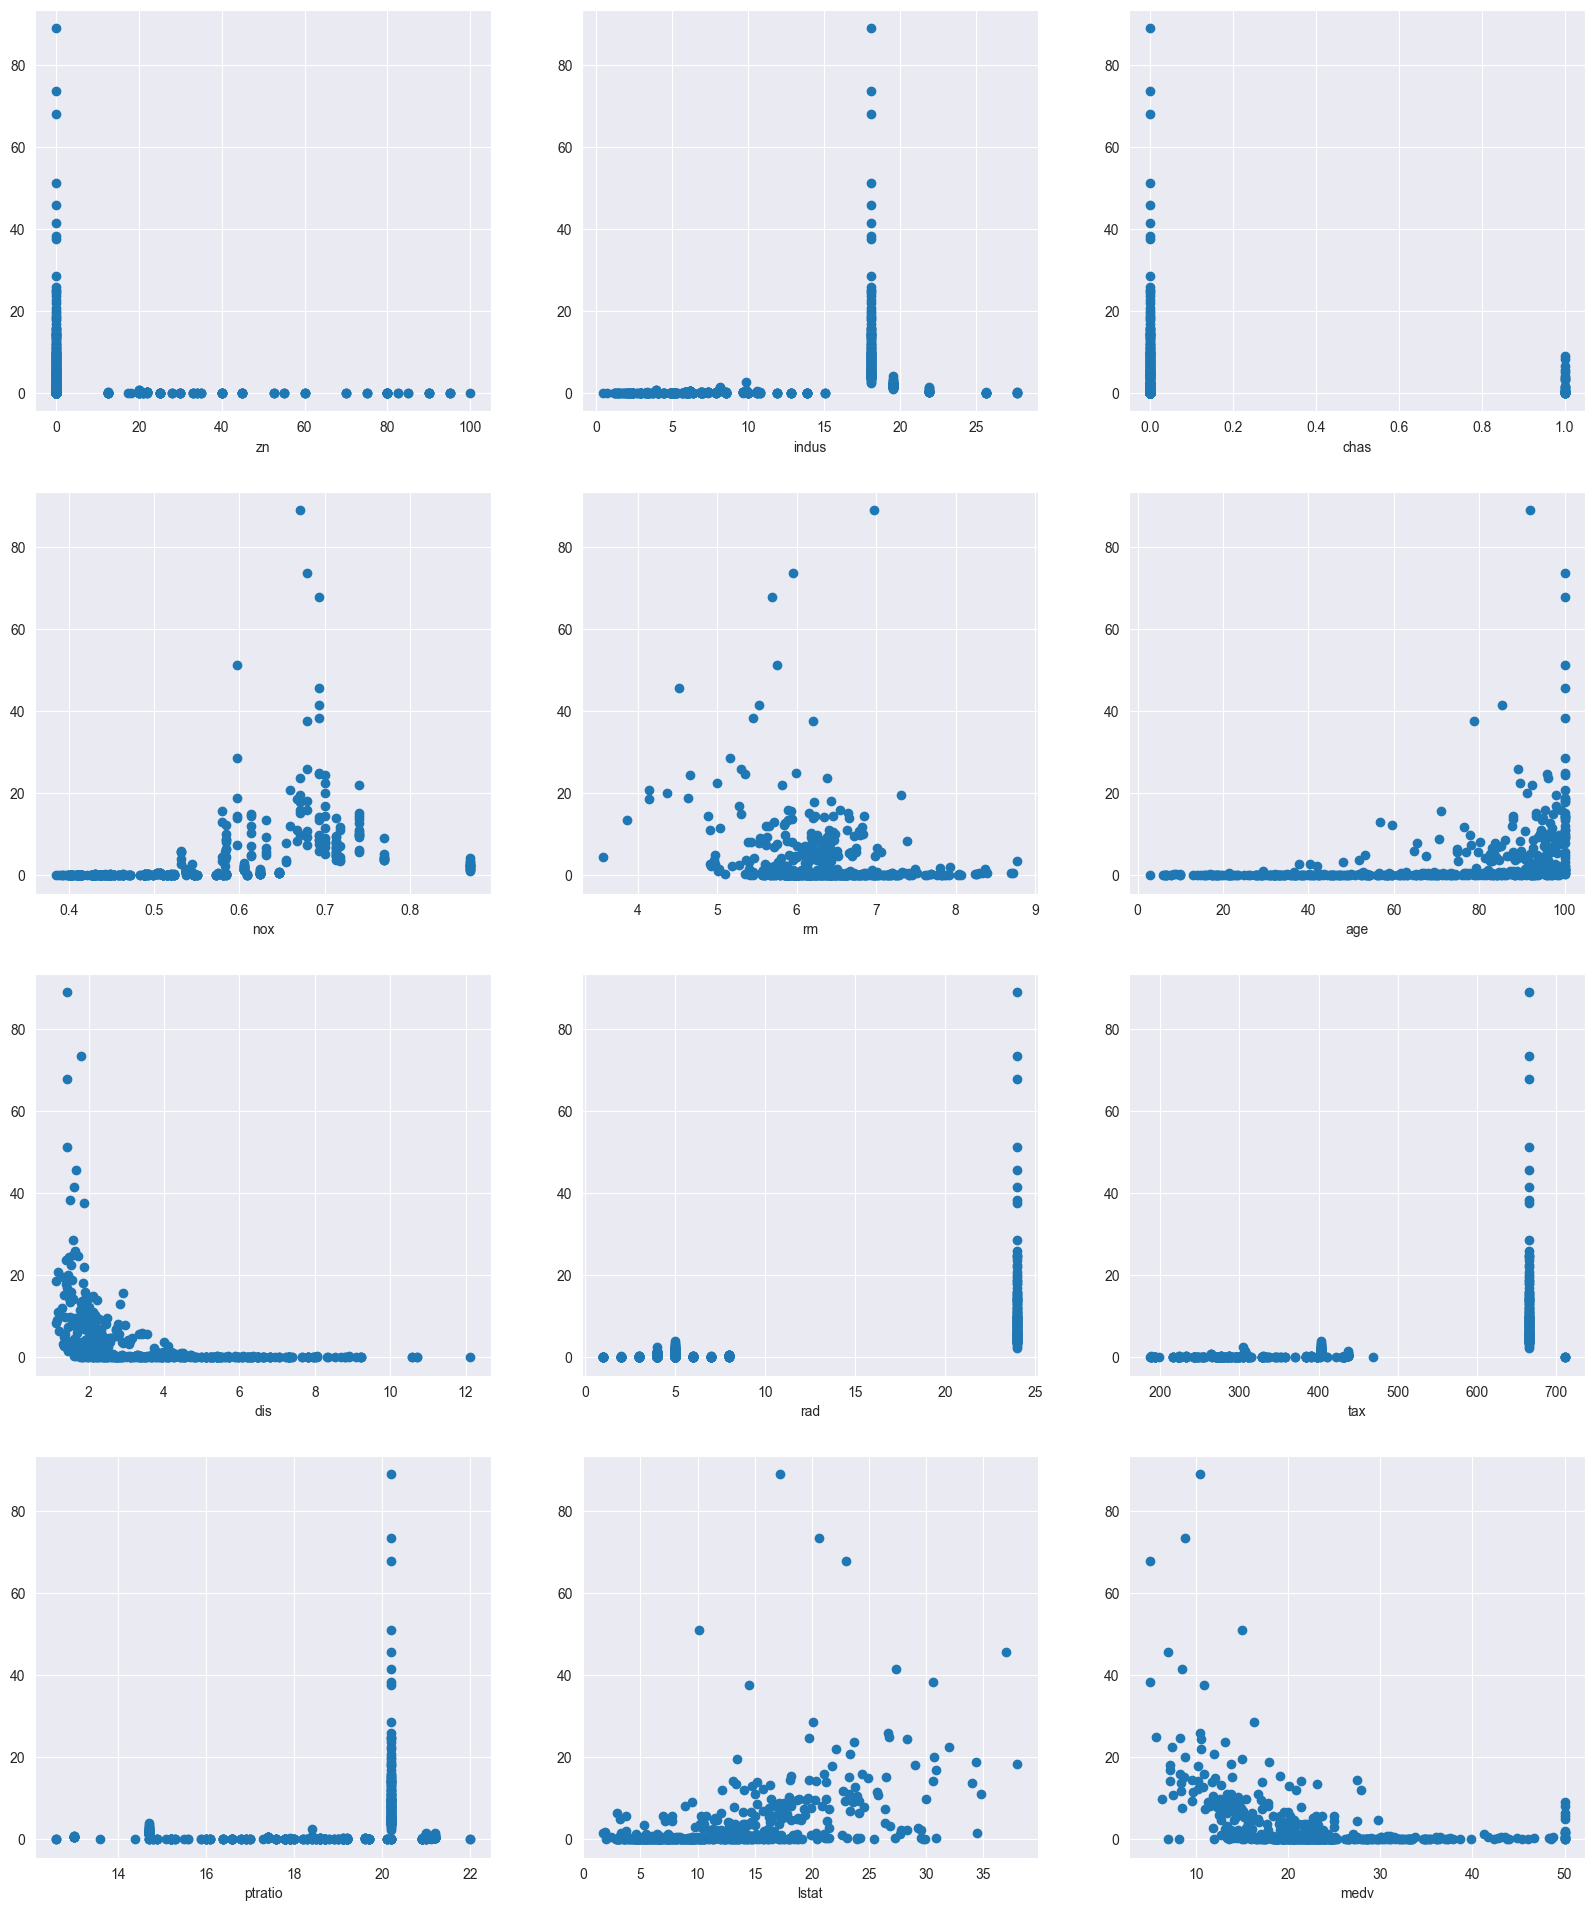

In [324]:
# plot response crim against each predictor

fig, axes = plt.subplots(4, 3, figsize=(20,24))

for ax, predictor in zip(axes.flatten()[:len(predictors_15)], predictors_15):
    ax.scatter(data_15[predictor], data_15['crim'])
    ax.set_xlabel(predictor)


### 15.a

The results of the models are presented in the table summarizing the regression results displayed above. The table shows that few models have strong explanatory power and the relationship between their respective predictors and the response **crim** is not statistically strong.

Of all the 12 models, the model whose predictor is **rad** - i.e. index of accessibility to radial highways - has the highest R-squared values (0.39), followed by **tax** - i.e. full-value property tax rate per $10,000 - (0.34), and by **lsat** - i.e. lower status of the population - (0.21). It means that these three models can account for approximately 39%, 34% and 21% of the variance in the response **crim** respectively. The remaining models have R-squared values in the range of 0.04 to 0.18, accounting for 4% to 18% of the variance in the response **crim**.

For 3 models **rad**, **tax**, **lsat**, the F-statistic values are also significantly higher than the remaining (323.94, 259.19, 132.04) with infinitesimal p-values, strongly rejecting the null-hypothesis $H_0: \beta_1 = 0$. The t-statistic values of the predictor coefficients of these three models are in agreement with the F test. Their t-statistic are significantly far from 0 (18.00, 16.10 and 11.49) with very low p-values (virtually approximate 0). The 95% confidence interval of these 3 coefficients also exclude 0. These signs indicate that there is a statistically significant relationship between these three predictors individually and the response **crim**. The F test and t-test of the remaining models, although lower than these 3 models, are high enough and coupled with low p-values, sufficient to reject the null-hypothesis $H_0: \beta_1 = 0$, supporting the statistical significance in the relationship between these predictors and the response **crim**.

The model with predictor **chas** - i.e. if tract bounds the Charles River or not - has a very low R-squared value (0.0031), accounting for 0.31% of the variance in the response **crim**. Additionally, the F-statistic value is slightly low (1.58) with quite high p-value (0.209). This supports the null-hypothesis $H_0: \beta_1 = 0$. The t-statistic of the coefficient of the model is low (-1.26) with a high p-value (0.209). The 95% confidence interval of the coefficient (-4.85, 1.07) includes the value 0. These signs indicate that there is no statistically significant relationship between the predictor **chas** and the response **crim**.

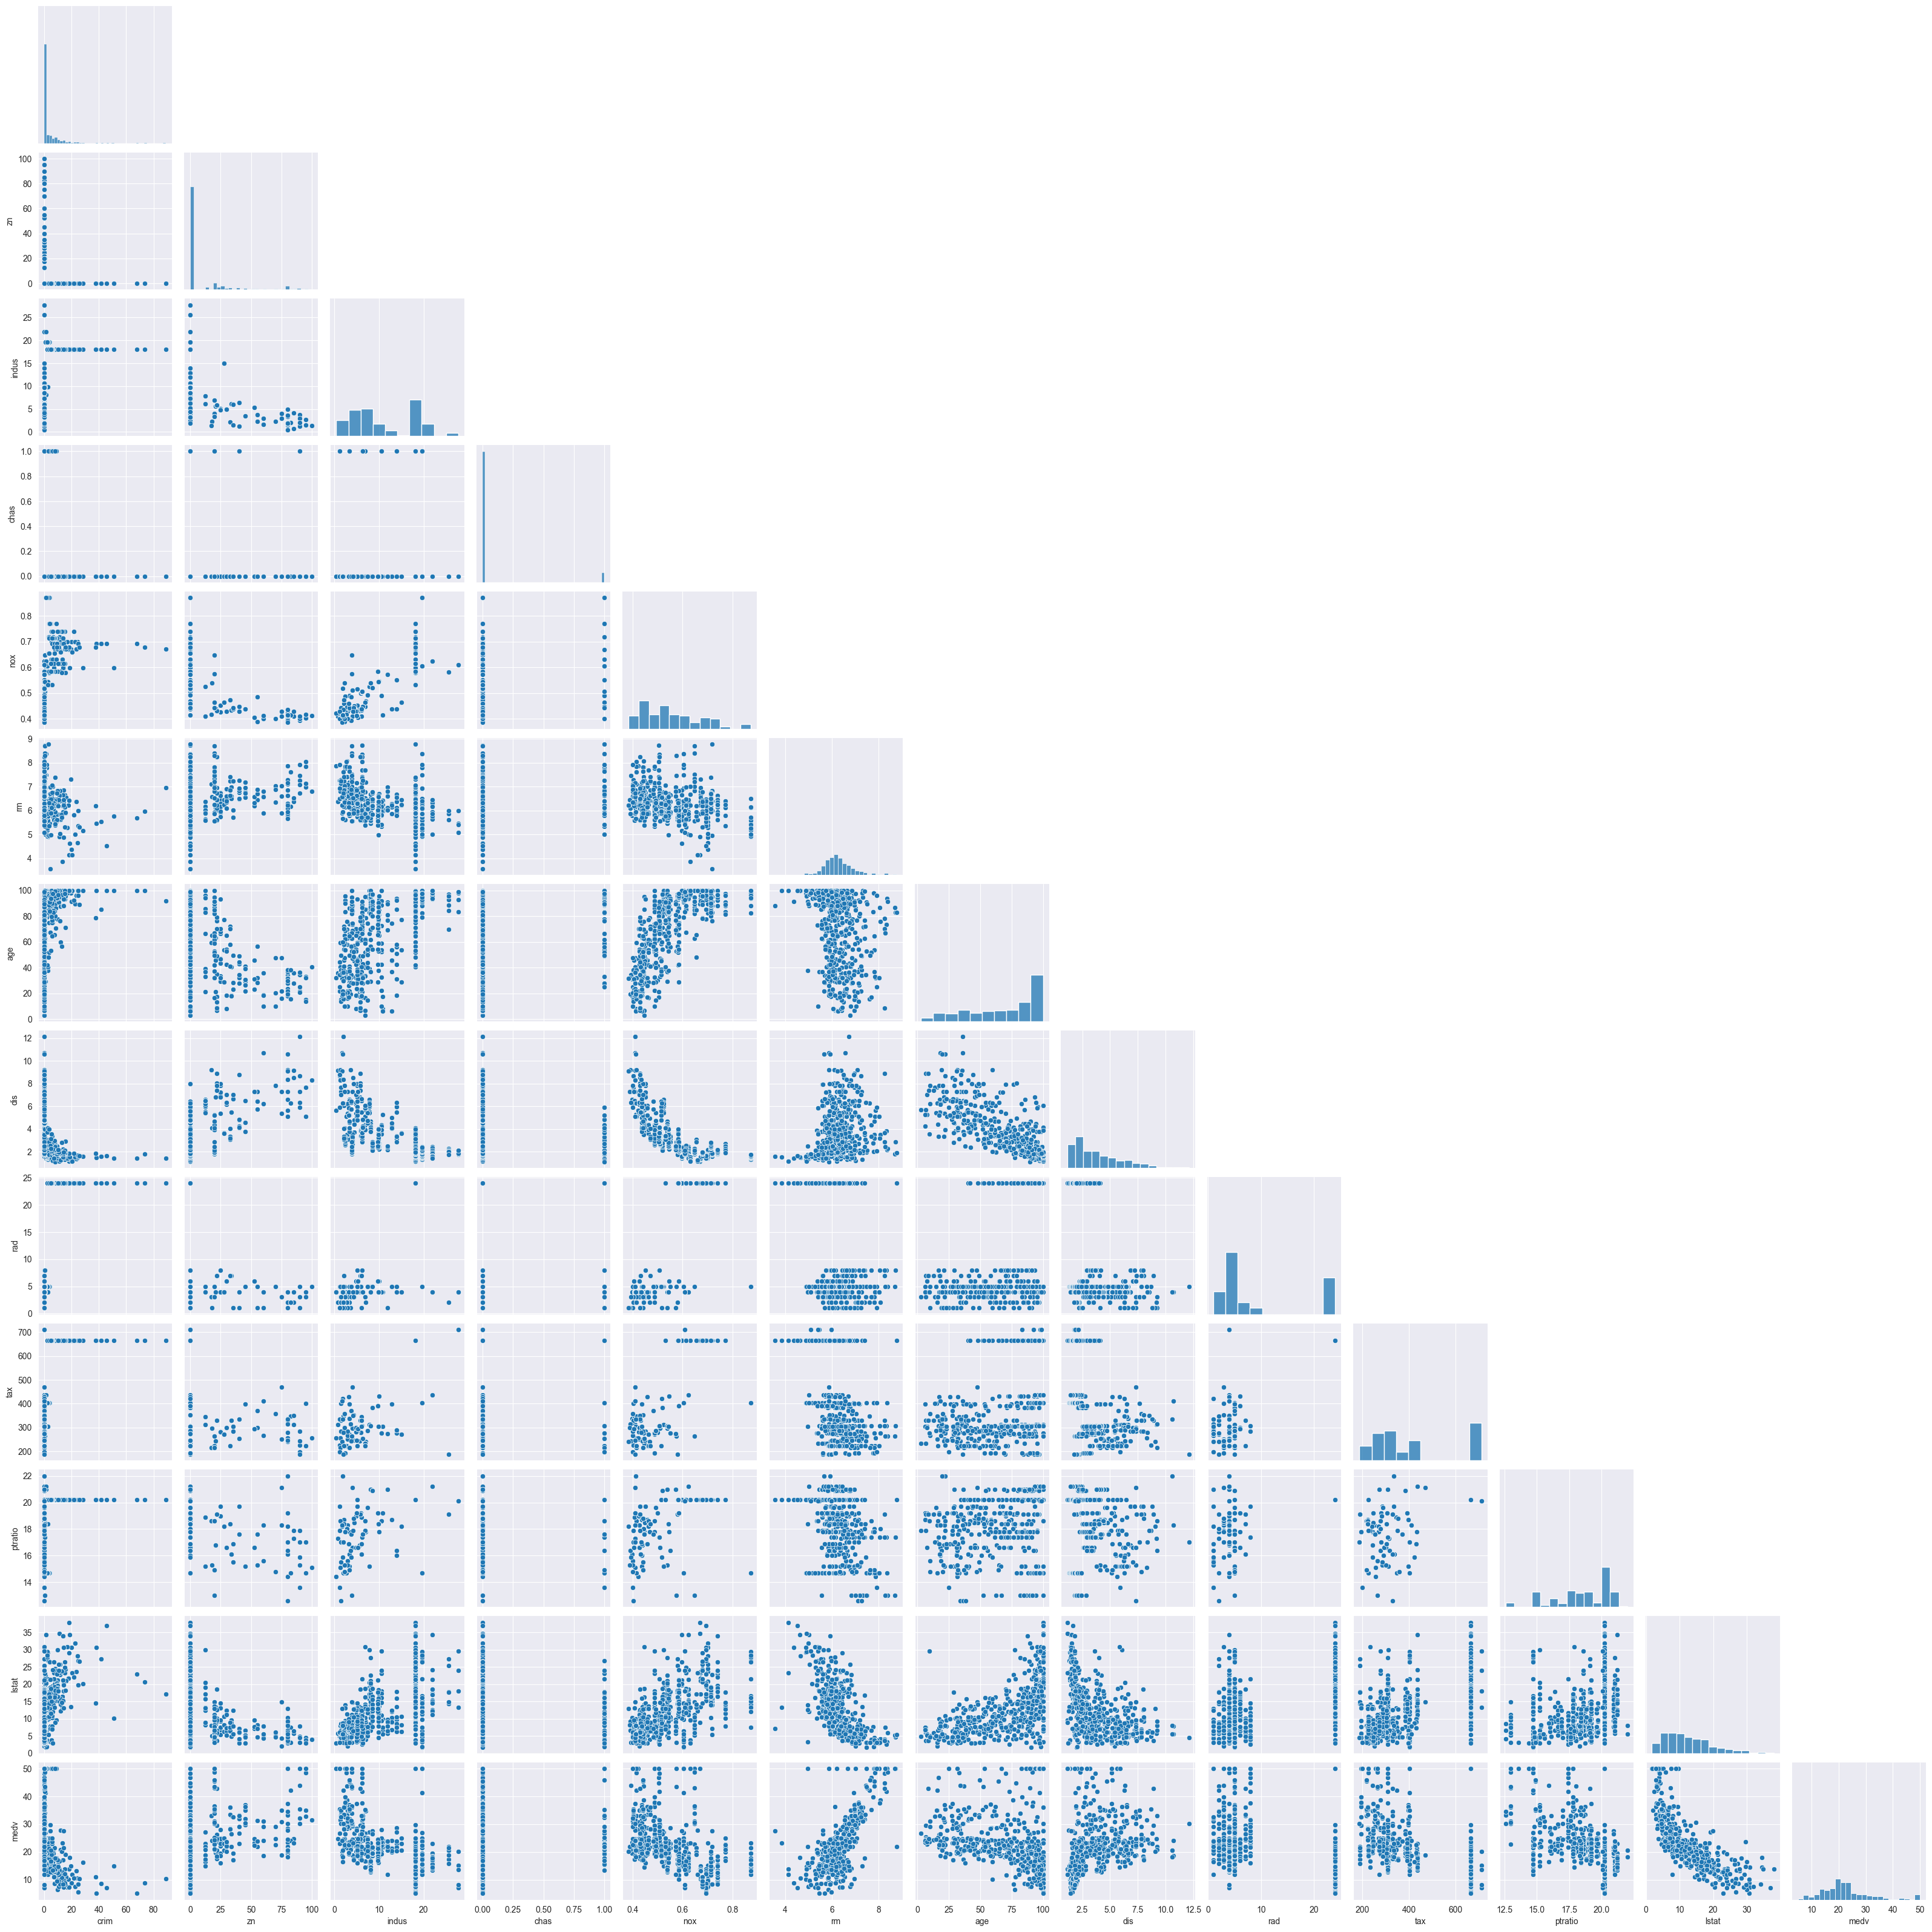

In [325]:
sns.pairplot(data_15, corner=True);

In [326]:
# fit a multiple regression model to predict the response using all predictors.

model_15_b = sm.OLS(data_15['crim'], prepare_data(data_15, predictors=predictors_15, add_intercept=True)).fit()
model_15_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           2.03e-56
Time:                        10:34:10   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

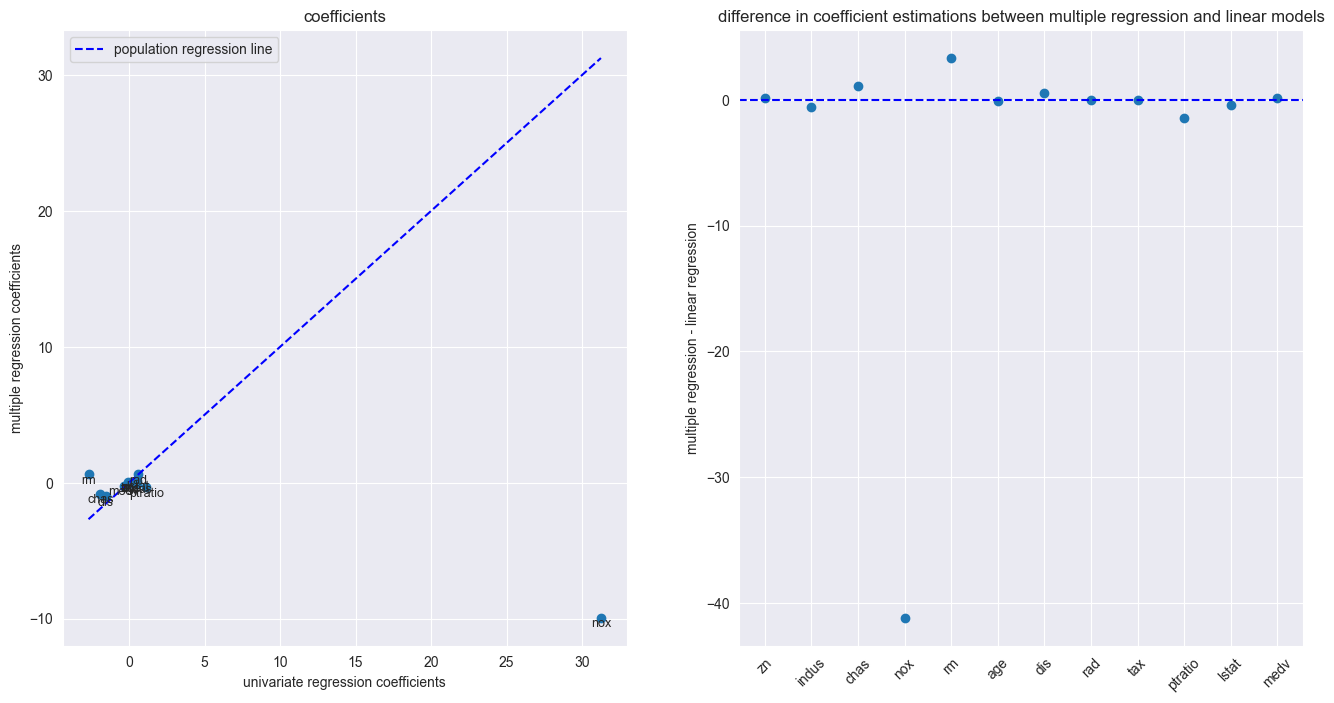

In [327]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

plot_scatter_simple_linear(results_df_15_a['coefficient'], model_15_b.params[predictors_15], bi_true=(0, 1), subplot=(fig, ax[0]))
ax[0].set_xlabel('univariate regression coefficients')
ax[0].set_ylabel('multiple regression coefficients')
for i, predictor in enumerate(predictors_15):
    ax[0].text(results_df_15_a.loc[predictor, 'coefficient'], model_15_b.params[predictor], predictor, fontsize=9, ha='center', va='top')
ax[0].set_title('coefficients')

ax[1].scatter(predictors_15, (model_15_b.params[predictors_15] - results_df_15_a['coefficient']))
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].axhline(y=0, color='b', linestyle='--', label='y = 0')
ax[1].set_ylabel('multiple regression - linear regression')
ax[1].set_title('difference in coefficient estimations between multiple regression and linear models');

### 15.b

The multiple regression model has a high R-squared (0.449) and adjusted R-squared value (0.436), accounting for around 44.9% of the variance in the response **crim**. The F-statistic value is high (33.52) with low p-value, rejecting the null hypothesis $H_0: \beta_i = 0$. However, the t-statistic tests show that the relationship between most of the predictors and the response **crim** are statistically insignificant, including the predictor **tax** and **lstat**, as the p-values of the t-tests are higher than the acceptable threshold 0.05. In particular, the t-test shows that the null hypothesis can be rejected for **dis**, **rad**, **medv**.

### 15.c

The scatter plot of the multiple regression coefficients against the univariate regression coefficients show that there are some slight variances in the coefficient estimations between the multiple regression model and the linear regression models. The estimation for the most coefficients between the 2 models are approximately equal. The most significant difference in the estimation is that of predictor **nox** - i.e. nitrogen oxides concentration: the estimation is -9.96 in the multiple regression model, 31.25 in the linear regression model. Another significant difference in estimations is that of predictor **rm** - i.e. average number of rooms per dwellings: the estimation is 0.63 in the multiple regression model, -2.68 in the linear regression model.

The multiple regression model offers more explanatory power as its R-squared value is significantly higher than the linear model. However, this improvement in explanatory power can be attributed to the increased number of predictors in this model. The multiple regression model has 12 predictors, compared to 1 predictor to the linear models. However, it only offers 5,9% and 10,9% more explanatory power over the variance in the response **crim** compared to the two linear model with the highest R-squared value (44.9% vs. 39% and 34%), indicating that there is a diminishing return in explanatory power when adding more predictors to the model.

The t-tests of the linear models and that of the multiple regression model show contrasting results, indicating that while there is a statistically significant relationship between most predictors, excepting **chas**, and the response **crim**, these individual relationships are not accurately captured by the multiple regression model. For instance, while **tax** and **lstat** are the two predictors offering rather high explanatory power and show strong relationship with the response **crim** in the linear models, the t-test result of the multiple regression model shows that the relationships are statistically insignificant.

The diminishing return of explanatory power with added predictors and the inaccuracy in the captured relationships in the multiple regression model are potentially due to multicollinearity. The pairplots showing the scatter plots of the predictors and the response **crim** show that there are some correlational relationship among the predictors themselves.

In [328]:
# transform the predictors
# func = [np.log, np.sqrt, np.square]
Xs_15 = []
for predictor in predictors_15:
    buf = data_15[predictor].copy().to_frame()
    buf.insert(loc=0, column='intercept', value=np.ones(buf.shape[0]))
    for i in range(2,4):
        buf.insert(loc=buf.shape[1], column=f'{predictor}_pow_{i}', value=buf[predictor].pow(i))
    Xs_15.append(buf)

# fit models
models_15_d = [sm.OLS(data_15['crim'], x).fit() for x in Xs_15]

In [329]:
def create_DataFrame_from_model_results_nonlinear(models, predictors):

    # Create an empty list to store the data for each row
    results_list = []

    # Iterate through each model and its corresponding base predictor name
    for i, model in enumerate(models):
        # Get the base predictor name for the current model
        base_predictor = predictors[i]

        # --- 1. Extract MODEL-LEVEL statistics ---
        # These are the same for all terms from this one model
        r_squared = model.rsquared
        f_statistic = model.fvalue
        p_value_f = model.f_pvalue

        # --- 2. Define the predictor terms for this model ---
        predictor_terms = [
            base_predictor,
            f'{base_predictor}_pow_2',
            f'{base_predictor}_pow_3'
        ]

        # --- 3. Loop through each term to extract its specific stats ---
        for term in predictor_terms:
            # Extract coefficient-level statistics for the specific term
            coefficient = model.params[term]
            std_err = model.bse[term]
            t_statistic = model.tvalues[term]
            p_value_t = model.pvalues[term]

            # Extract the confidence interval for this specific term
            conf_int = model.conf_int().loc[term]

            # Append all the information as a dictionary to our list
            # This dictionary represents one row in the final DataFrame
            results_list.append({
                'predictor': term,
                'R-squared': r_squared,
                'F-statistic': f_statistic,
                'p-value F-stats': p_value_f,
                'coefficient': coefficient,
                'standard error': std_err,
                't-statistic': t_statistic,
                'P>|t|': p_value_t,
                '0.025': conf_int[0],
                '0.975': conf_int[1]
            })

    # --- 4. Create the final DataFrame ---
    results_df = pd.DataFrame(results_list).set_index('predictor')
    return results_df

results_df_15_d = create_DataFrame_from_model_results_nonlinear(models_15_d, predictors_15)
display(results_df_15_d)

,R-squared,F-statistic,p-value F-stats,coefficient,standard error,t-statistic,P>|t|,0.025,0.975
predictor,,,,,,,,,
zn,0.058242,10.348543,1.281293e-06,-3.321884e-01,1.098081e-01,-3.025171,2.612296e-03,-5.479286e-01,-1.164483e-01
zn_pow_2,0.058242,10.348543,1.281293e-06,6.482634e-03,3.860728e-03,1.679122,9.375050e-02,-1.102542e-03,1.406781e-02
zn_pow_3,0.058242,10.348543,1.281293e-06,-3.775793e-05,3.138615e-05,-1.203012,2.295386e-01,-9.942232e-05,2.390647e-05
indus,0.259658,58.688291,1.549271e-32,-1.965213e+00,4.819901e-01,-4.077289,5.297064e-05,-2.912179e+00,-1.018247e+00
indus_pow_2,0.259658,58.688291,1.549271e-32,2.519373e-01,3.932212e-02,6.407011,3.420187e-10,1.746811e-01,3.291935e-01
indus_pow_3,0.259658,58.688291,1.549271e-32,-6.976009e-03,9.566596e-04,-7.292049,1.196405e-12,-8.855558e-03,-5.096459e-03
chas,0.003124,1.579364,2.094345e-01,-6.309255e-01,5.020385e-01,-1.256727,2.094345e-01,-1.617272e+00,3.554205e-01
chas_pow_2,0.003124,1.579364,2.094345e-01,-6.309255e-01,5.020385e-01,-1.256727,2.094345e-01,-1.617272e+00,3.554205e-01
chas_pow_3,0.003124,1.579364,2.094345e-01,-6.309255e-01,5.020385e-01,-1.256727,2.094345e-01,-1.617272e+00,3.554205e-01


In [330]:
predictors_15_d = []
for predictor in ['indus', 'nox', 'dis', 'medv']:
    predictors_15_d += [predictor, * [f'{predictor}_pow_{i}' for i in range(2, 4)]]

results_df_15_d.loc[predictors_15_d, :]

,R-squared,F-statistic,p-value F-stats,coefficient,standard error,t-statistic,P>|t|,0.025,0.975
predictor,,,,,,,,,
indus,0.259658,58.688291,1.549271e-32,-1.965213,0.481990,-4.077289,5.297064e-05,-2.912179,-1.018247
indus_pow_2,0.259658,58.688291,1.549271e-32,0.251937,0.039322,6.407011,3.420187e-10,0.174681,0.329194
indus_pow_3,0.259658,58.688291,1.549271e-32,-0.006976,0.000957,-7.292049,1.196405e-12,-0.008856,-0.005096
nox,0.296978,70.686684,3.806639e-38,-1279.371252,170.397473,-7.508159,2.758372e-13,-1614.151311,-944.591192
nox_pow_2,0.296978,70.686684,3.806639e-38,2248.544053,279.899273,8.033404,6.811300e-15,1698.625715,2798.462391
nox_pow_3,0.296978,70.686684,3.806639e-38,-1245.702874,149.281640,-8.344649,6.961110e-16,-1538.996638,-952.409110
dis,0.277825,64.374052,3.135721e-35,-15.554353,1.735967,-8.960049,6.374792e-18,-18.965010,-12.143697
dis_pow_2,0.277825,64.374052,3.135721e-35,2.452072,0.346419,7.078333,4.941214e-12,1.771462,3.132683
dis_pow_3,0.277825,64.374052,3.135721e-35,-0.118599,0.020400,-5.813544,1.088832e-08,-0.158679,-0.078518


### 15.d

Fitting a model for each predictor with the cubic polynomial regression form $Y = \beta_0 + \beta_1*X + \beta_2*X^2 + \beta_3*X^3$, the results show that there are non-linear association between the following predictors and the response **crim**: **indus**, **nox**, **dis**, **medv**. The primary reason is the higher order terms (quadratic $X^2$ and cubic $X^3$) of these predictors individually have statistical significance in each model, which is demonstrated through the high t-statistic values and low p-values (virtually 0). Additionally, these polynomial models have substantially high F-statistic values and low p-values (virtually 0), strongly rejecting the null hypothesis $H_0: \beta_i = 0$. Finally, the improved R-squared values of these models show that as the models are non-linear and better captures the relationship between the predictors and the response **crim**, the models can account for more variance in the response **crim**.

On the contrary, other cubic polynomial models using predictors like **rad** or **age** show different patterns. While their R-squared values and F-statistic are high with low p-values, these models fail the t-test: the t-statistic values are low with relatively high p-values (approximate or above the 0.005 threshold) for all the coefficients. These signs indicate that while these models offer significant overall performance, they don't accurately capture the relationship between the predictors and the response **crim**. In fact, multicollinearity among the different power of the predictors appear to reduce the accuracy in the captured relationships, indicating that there is no non-linear association between the remaining predictors with the response **crim**.